In [1]:
! conda install -y mlxtend

Solving environment: done

# All requested packages already installed.



In [70]:
import pandas as pd
import numpy as np
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['jpg']  # or svg
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

import itertools
import pickle
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor)
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
import xgboost as xgb

def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())
from matplotlib import pyplot as plt

sns.set(context='notebook', style='whitegrid')

In [2]:
avocado = pd.read_csv('2021-plu-total-hab-data.csv')
avocado = avocado.append(pd.read_csv('2020-plu-total-hab-data.csv'))
avocado = avocado.append(pd.read_csv('2019-plu-total-hab-data.csv'))
avocado = avocado.append(pd.read_csv('2018-plu-total-hab-data.csv'))
avocado

Geography Timeframe Current Year Week Ending          Type  \
0                    Albany    Weekly      2021-01-04 00:00:00  Conventional   
1                   Atlanta    Weekly      2021-01-04 00:00:00  Conventional   
2      Baltimore/Washington    Weekly      2021-01-04 00:00:00  Conventional   
3     Birmingham/Montgomery    Weekly      2021-01-04 00:00:00  Conventional   
4                     Boise    Weekly      2021-01-04 00:00:00  Conventional   
...                     ...       ...                      ...           ...   
5287              St. Louis    Weekly      2018-12-02 00:00:00       Organic   
5288               Syracuse    Weekly      2018-12-02 00:00:00       Organic   
5289                  Tampa    Weekly      2018-12-02 00:00:00       Organic   
5290                   West    Weekly      2018-12-02 00:00:00       Organic   
5291    West Tex/New Mexico    Weekly      2018-12-02 00:00:00       Organic   

      ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0             1.237368                  161850.33     7225.73   130204.01   
1             0.816395                  780570.69   308199.17    45153.36   
2             1.039410                 1006837.64   220482.26   282498.61   
3             0.731857                  348845.24   177970.28    12901.64   
4             0.874298                  152240.40    39164.12    15398.73   
...                ...                        ...         ...         ...   
5287          1.700000                   10498.86     3932.18     1576.70   
5288          1.250000                    4679.51       55.30      146.05   
5289          1.290000                    7374.15      176.32        5.44   
5290          1.620000                  268969.03    41309.81    53312.06   
5291          1.690000                   16553.71     2495.29     3328.96   

      4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0          76.41           19476.68         16623.19          2633.40   
1          80.81          171244.48        156431.07         10715.51   
2        3749.76          413855.38        384221.35             3.15   
3          10.01           93996.81         80416.64         11883.90   
4        1232.75           29772.49         24111.88            16.93   
...          ...                ...              ...              ...   
5287       62.30            4927.68          3151.07          1776.61   
5288        0.00            4478.16          3028.69          1449.47   
5289        0.00            7192.39          7192.39             0.00   
5290      199.07          174148.09         87052.31         87095.78   
5291        0.00           10729.46          9803.18           926.28   

      X-LrgBagged Units  Bulk GTIN  
0                  0.00    4867.50  
1               2159.45  255892.88  
2              19318.95   86251.63  
3               1260.49   63966.51  
4                281.67   66672.30  
...                 ...        ...  
5287               0.00        NaN  
5288               0.00        NaN  
5289               0.00        NaN  
5290               0.00        NaN  
5291               0.00        NaN  

[20340 rows x 14 columns]

In [3]:
avocado.head()

Geography Timeframe Current Year Week Ending          Type  \
0                 Albany    Weekly      2021-01-04 00:00:00  Conventional   
1                Atlanta    Weekly      2021-01-04 00:00:00  Conventional   
2   Baltimore/Washington    Weekly      2021-01-04 00:00:00  Conventional   
3  Birmingham/Montgomery    Weekly      2021-01-04 00:00:00  Conventional   
4                  Boise    Weekly      2021-01-04 00:00:00  Conventional   

   ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0          1.237368                  161850.33     7225.73   130204.01   
1          0.816395                  780570.69   308199.17    45153.36   
2          1.039410                 1006837.64   220482.26   282498.61   
3          0.731857                  348845.24   177970.28    12901.64   
4          0.874298                  152240.40    39164.12    15398.73   

   4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0       76.41           19476.68         16623.19          2633.40   
1       80.81          171244.48        156431.07         10715.51   
2     3749.76          413855.38        384221.35             3.15   
3       10.01           93996.81         80416.64         11883.90   
4     1232.75           29772.49         24111.88            16.93   

   X-LrgBagged Units  Bulk GTIN  
0               0.00    4867.50  
1            2159.45  255892.88  
2           19318.95   86251.63  
3            1260.49   63966.51  
4             281.67   66672.30

In [4]:
avocado2 = (avocado.sort_values("Geography")).head(10)
avocado2.head(10)

Geography Timeframe Current Year Week Ending          Type  \
0       Albany    Weekly      2021-01-04 00:00:00  Conventional   
4106    Albany    Weekly      2020-09-20 00:00:00       Organic   
4105    Albany    Weekly      2020-09-27 00:00:00       Organic   
4104    Albany    Weekly      2020-10-04 00:00:00       Organic   
433     Albany    Weekly      2018-02-25 00:00:00  Conventional   
944     Albany    Weekly      2021-02-28 00:00:00  Conventional   
487     Albany    Weekly      2018-03-04 00:00:00  Conventional   
3891    Albany    Weekly      2020-09-13 00:00:00  Conventional   
3890    Albany    Weekly      2020-09-20 00:00:00  Conventional   
3889    Albany    Weekly      2020-09-27 00:00:00  Conventional   

      ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0             1.237368                  161850.33     7225.73   130204.01   
4106          1.690000                    2489.46       68.99      490.22   
4105          1.620000                    2861.45       70.66      416.85   
4104          1.540000                    2874.33       48.47      359.35   
433           1.280000                  104278.89    10368.77    59723.32   
944           1.012565                  133051.35     7063.90    94259.75   
487           1.080000                  139520.60    12002.12   105069.57   
3891          1.000000                  127042.36     6996.68    91194.61   
3890          1.010000                  138384.85     7597.76   103541.50   
3889          1.330000                  141639.57     6609.52   110176.88   

      4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0          76.41           19476.68         16623.19          2633.40   
4106        0.00            1930.25           494.54          1435.71   
4105        0.00            2373.94          1588.43           785.51   
4104        0.00            2466.51          2166.05           300.46   
433        48.00           34138.80         30126.31          3702.49   
944        30.54           26067.99         23569.20          2233.35   
487        95.62           22353.29         16128.51          5941.45   
3891      122.00           28729.07         18706.13          9665.99   
3890      109.84           27135.75         19434.39          7606.92   
3889      114.12           24739.05         18358.33          6294.20   

      X-LrgBagged Units  Bulk GTIN  
0                  0.00    4867.50  
4106               0.00        NaN  
4105               0.00        NaN  
4104               0.00        NaN  
433              310.00        NaN  
944                0.00    5629.18  
487              283.33        NaN  
3891             356.95        NaN  
3890              94.44        NaN  
3889              86.52        NaN

In [5]:
avocado.describe()

ASP Current Year  Total Bulk and Bags Units    4046 Units  \
count      20340.000000               2.034000e+04  2.034000e+04   
mean           1.348229               1.085977e+06  3.033199e+05   
std            0.346857               4.357930e+06  1.307811e+06   
min            0.500000               2.534500e+02  0.000000e+00   
25%            1.090000               2.125267e+04  5.651375e+02   
50%            1.319976               1.601406e+05  1.537696e+04   
75%            1.570000               5.728280e+05  1.258593e+05   
max            2.780000               6.371614e+07  2.162018e+07   

         4225 Units    4770 Units  TotalBagged Units  SmlBagged Units  \
count  2.034000e+04  2.034000e+04       2.034000e+04     2.034000e+04   
mean   2.472457e+05  1.822625e+04       4.599485e+05     3.105363e+05   
std    1.040932e+06  8.492064e+04       1.859105e+06     1.218801e+06   
min    0.000000e+00  0.000000e+00       4.555000e+01     9.370000e+00   
25%    2.043810e+03  0.000000e+00       1.527243e+04     1.137848e+04   
50%    1.760934e+04  1.098500e+02       7.553313e+04     5.518656e+04   
75%    1.038396e+05  3.261950e+03       2.260930e+05     1.592586e+05   
max    2.044550e+07  1.591800e+06       3.168919e+07     2.055041e+07   

       LrgBagged Units  X-LrgBagged Units     Bulk GTIN  
count     2.034000e+04       2.034000e+04  4.248000e+03  
mean      1.337122e+05       1.292330e+04  2.734184e+05  
std       6.248596e+05       6.503883e+04  1.128610e+06  
min       0.000000e+00       0.000000e+00  0.000000e+00  
25%       6.924650e+02       0.000000e+00  3.685287e+03  
50%       8.819535e+03       3.150000e+00  2.766128e+04  
75%       4.898844e+04       2.582130e+03  1.275364e+05  
max       1.332760e+07       1.403184e+06  1.550409e+07

In [6]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20340 entries, 0 to 5291
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  20340 non-null  object 
 1   Timeframe                  20340 non-null  object 
 2   Current Year Week Ending   20340 non-null  object 
 3   Type                       20340 non-null  object 
 4   ASP Current Year           20340 non-null  float64
 5   Total Bulk and Bags Units  20340 non-null  float64
 6   4046 Units                 20340 non-null  float64
 7   4225 Units                 20340 non-null  float64
 8   4770 Units                 20340 non-null  float64
 9   TotalBagged Units          20340 non-null  float64
 10  SmlBagged Units            20340 non-null  float64
 11  LrgBagged Units            20340 non-null  float64
 12  X-LrgBagged Units          20340 non-null  float64
 13  Bulk GTIN                  4248 non-null   floa

In [7]:
avocado['Year'] = avocado['Current Year Week Ending'].str[:4]
avocado

Geography Timeframe Current Year Week Ending          Type  \
0                    Albany    Weekly      2021-01-04 00:00:00  Conventional   
1                   Atlanta    Weekly      2021-01-04 00:00:00  Conventional   
2      Baltimore/Washington    Weekly      2021-01-04 00:00:00  Conventional   
3     Birmingham/Montgomery    Weekly      2021-01-04 00:00:00  Conventional   
4                     Boise    Weekly      2021-01-04 00:00:00  Conventional   
...                     ...       ...                      ...           ...   
5287              St. Louis    Weekly      2018-12-02 00:00:00       Organic   
5288               Syracuse    Weekly      2018-12-02 00:00:00       Organic   
5289                  Tampa    Weekly      2018-12-02 00:00:00       Organic   
5290                   West    Weekly      2018-12-02 00:00:00       Organic   
5291    West Tex/New Mexico    Weekly      2018-12-02 00:00:00       Organic   

      ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0             1.237368                  161850.33     7225.73   130204.01   
1             0.816395                  780570.69   308199.17    45153.36   
2             1.039410                 1006837.64   220482.26   282498.61   
3             0.731857                  348845.24   177970.28    12901.64   
4             0.874298                  152240.40    39164.12    15398.73   
...                ...                        ...         ...         ...   
5287          1.700000                   10498.86     3932.18     1576.70   
5288          1.250000                    4679.51       55.30      146.05   
5289          1.290000                    7374.15      176.32        5.44   
5290          1.620000                  268969.03    41309.81    53312.06   
5291          1.690000                   16553.71     2495.29     3328.96   

      4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0          76.41           19476.68         16623.19          2633.40   
1          80.81          171244.48        156431.07         10715.51   
2        3749.76          413855.38        384221.35             3.15   
3          10.01           93996.81         80416.64         11883.90   
4        1232.75           29772.49         24111.88            16.93   
...          ...                ...              ...              ...   
5287       62.30            4927.68          3151.07          1776.61   
5288        0.00            4478.16          3028.69          1449.47   
5289        0.00            7192.39          7192.39             0.00   
5290      199.07          174148.09         87052.31         87095.78   
5291        0.00           10729.46          9803.18           926.28   

      X-LrgBagged Units  Bulk GTIN  Year  
0                  0.00    4867.50  2021  
1               2159.45  255892.88  2021  
2              19318.95   86251.63  2021  
3               1260.49   63966.51  2021  
4                281.67   66672.30  2021  
...                 ...        ...   ...  
5287               0.00        NaN  2018  
5288               0.00        NaN  2018  
5289               0.00        NaN  2018  
5290               0.00        NaN  2018  
5291               0.00        NaN  2018  

[20340 rows x 15 columns]

In [8]:
X = avocado.loc[:,'ASP Current Year':'X-LrgBagged Units']
y = avocado["Type"]

In [9]:
X.head()

ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0          1.237368                  161850.33     7225.73   130204.01   
1          0.816395                  780570.69   308199.17    45153.36   
2          1.039410                 1006837.64   220482.26   282498.61   
3          0.731857                  348845.24   177970.28    12901.64   
4          0.874298                  152240.40    39164.12    15398.73   

   4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0       76.41           19476.68         16623.19          2633.40   
1       80.81          171244.48        156431.07         10715.51   
2     3749.76          413855.38        384221.35             3.15   
3       10.01           93996.81         80416.64         11883.90   
4     1232.75           29772.49         24111.88            16.93   

   X-LrgBagged Units  
0               0.00  
1            2159.45  
2           19318.95  
3            1260.49  
4             281.67

In [10]:
avocado.Type.unique()

array(['Conventional', 'Organic', 'Conventional '], dtype=object)

In [11]:
avocado['Type'] =  avocado['Type'].str.strip()

In [12]:
y.head()

0    Conventional
1    Conventional
2    Conventional
3    Conventional
4    Conventional
Name: Type, dtype: object

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

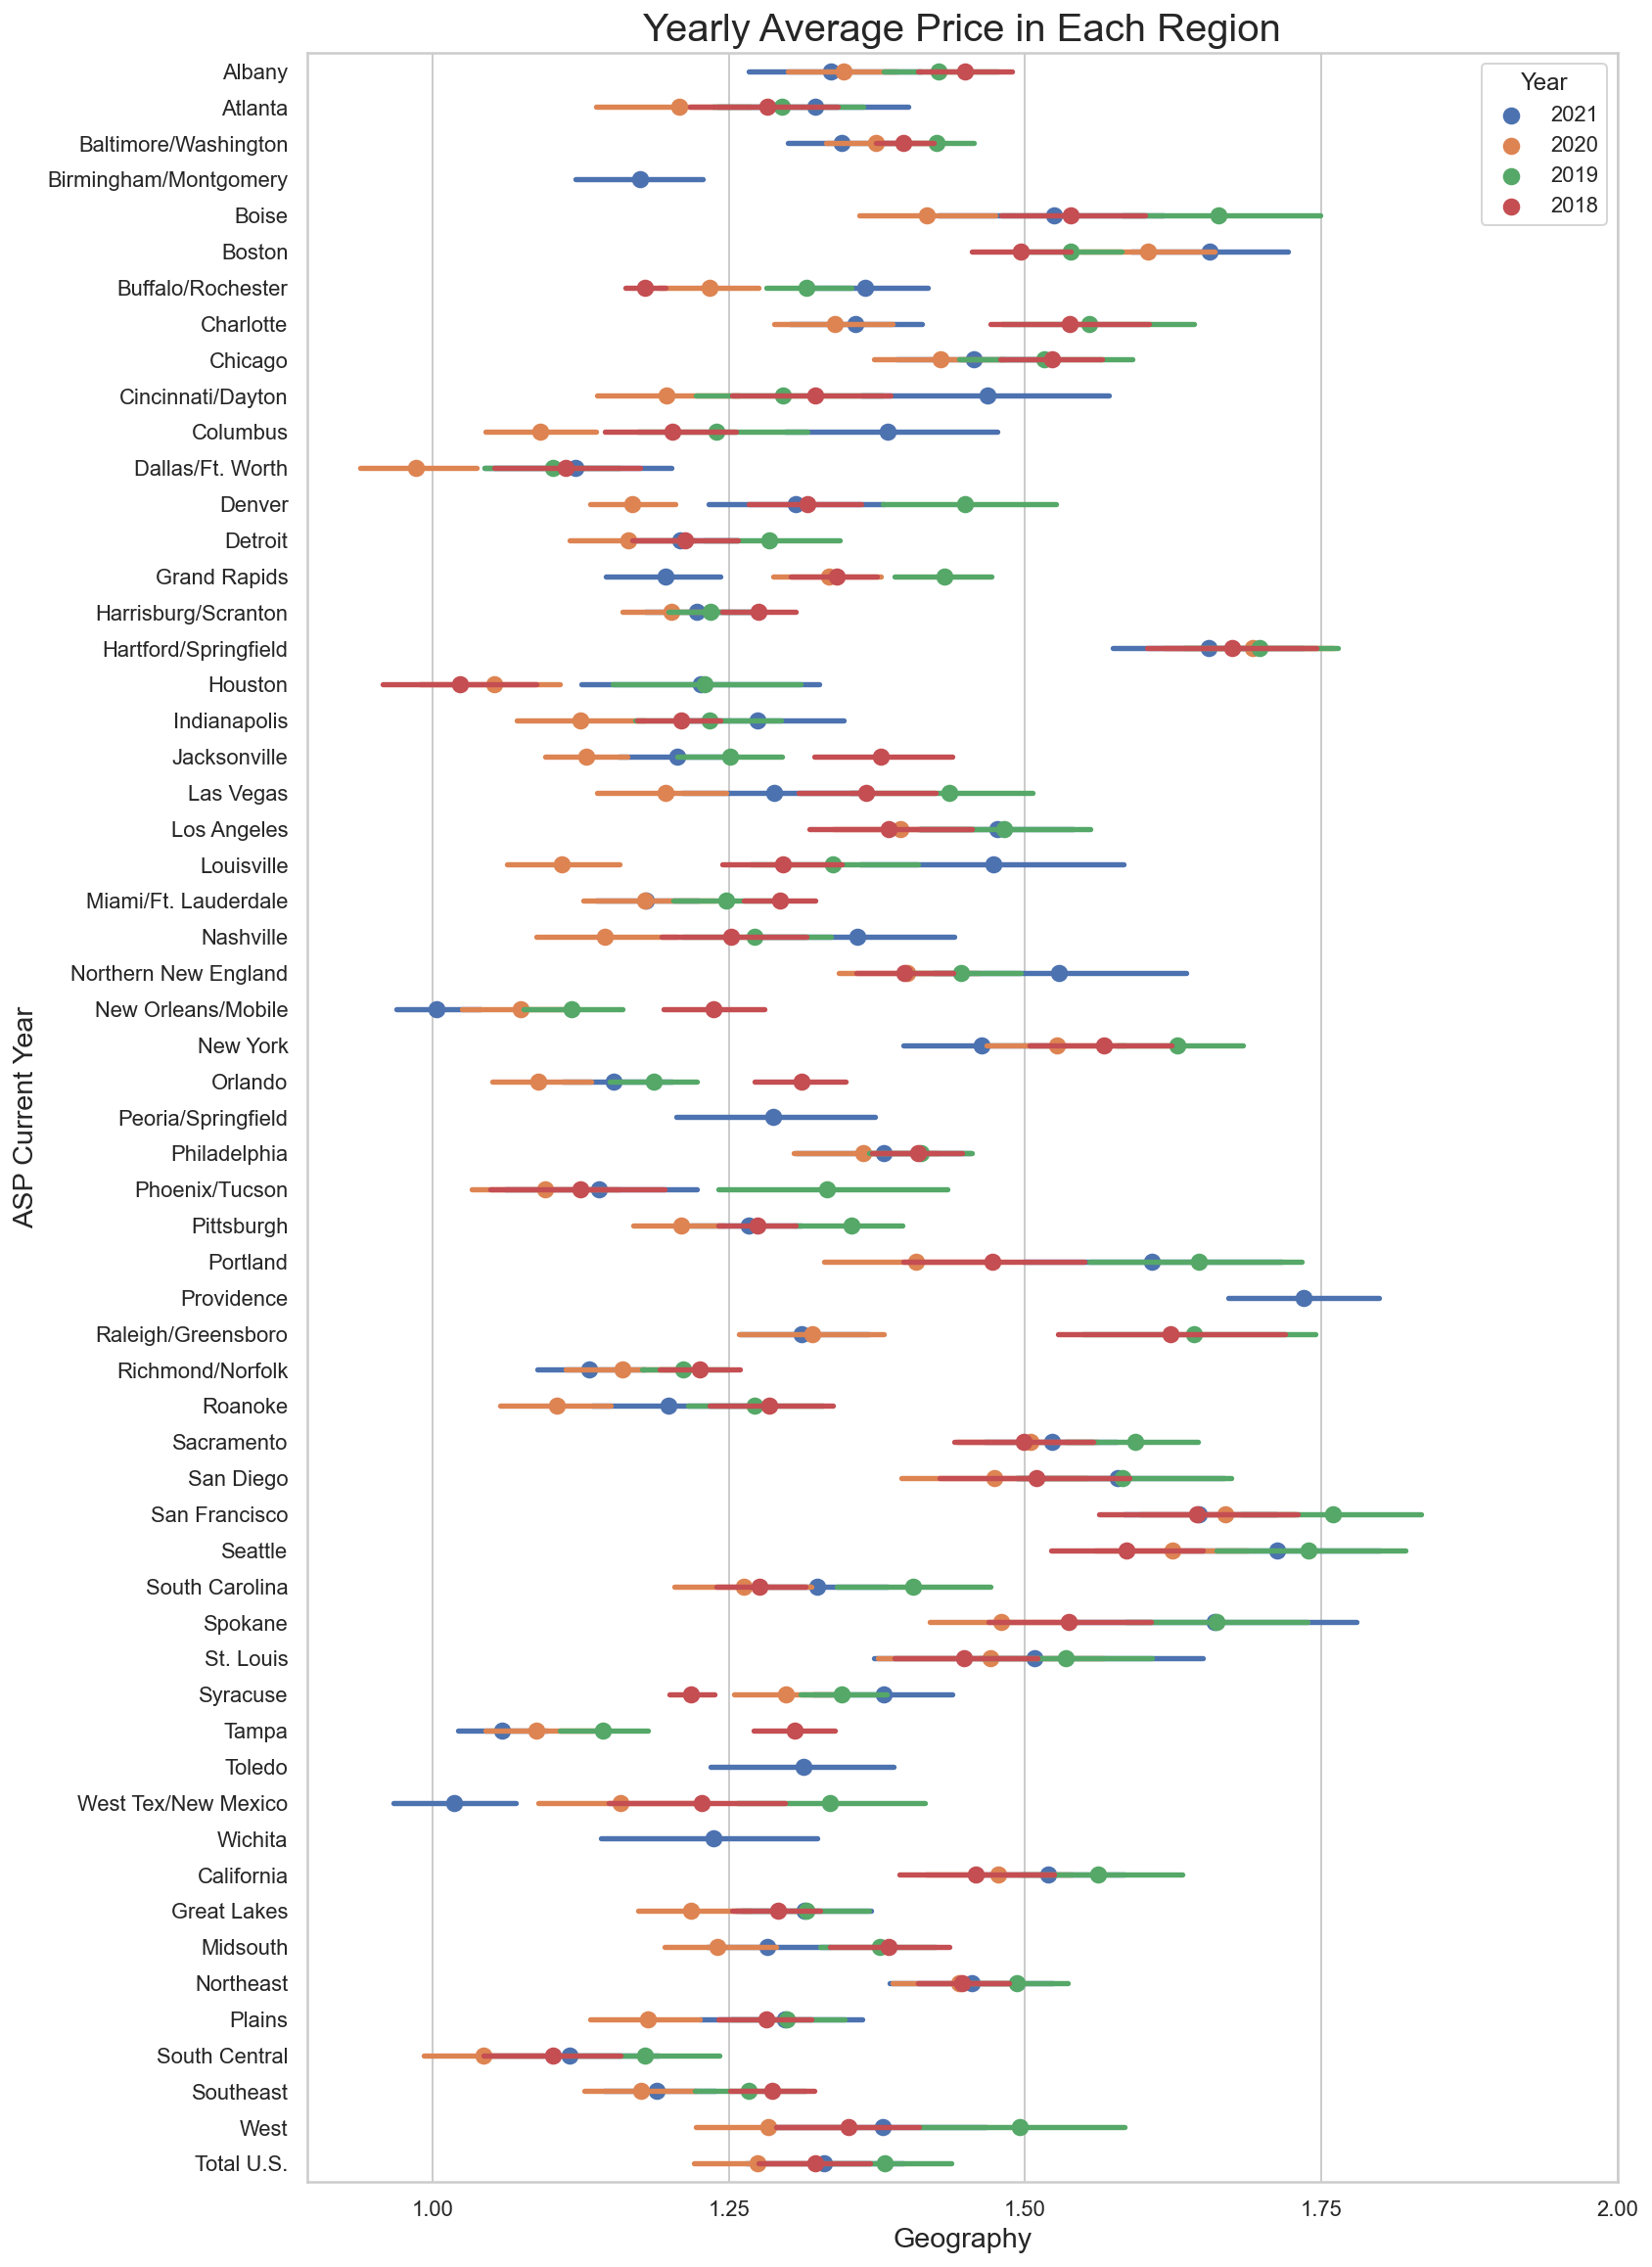

In [13]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='ASP Current Year',y='Geography',data=avocado, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Geography',{'fontsize' : 'large'})
plt.ylabel('ASP Current Year',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

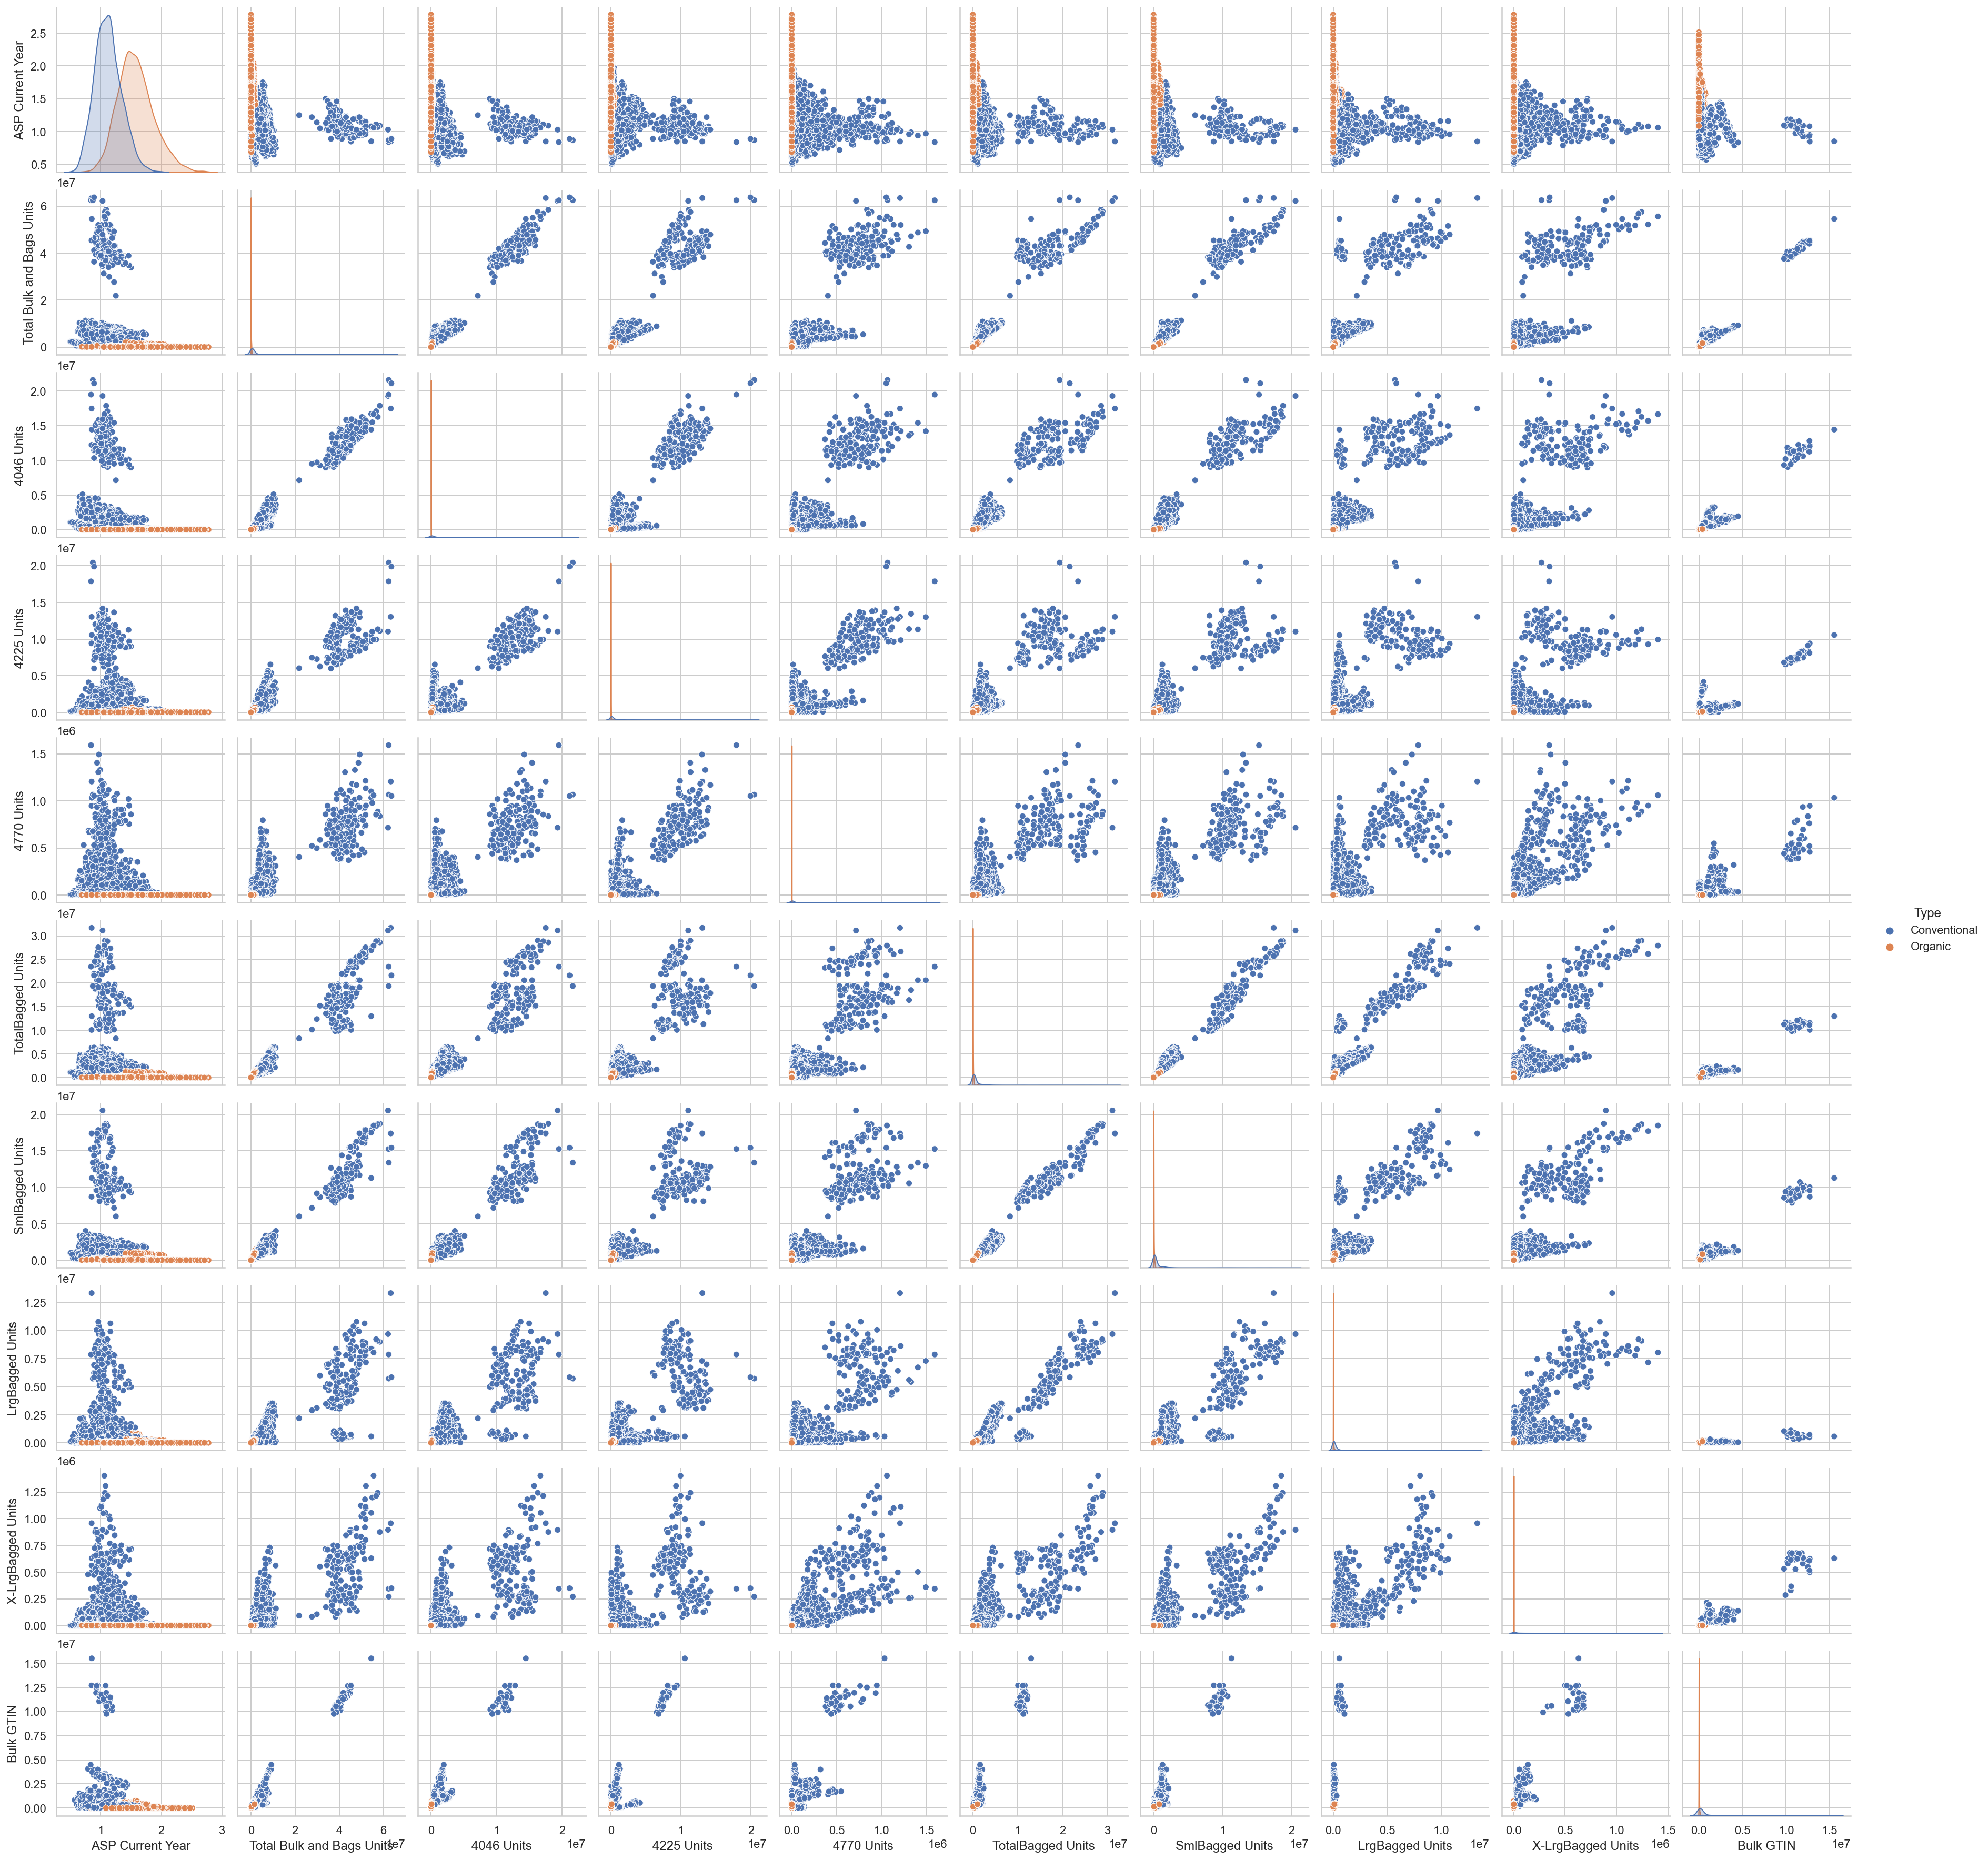

In [14]:
sns.pairplot(avocado, hue = 'Type')

In [15]:
avocado['Type']=avocado.Type.eq('Organic').mul(1)
avocado

Geography Timeframe Current Year Week Ending  Type  \
0                    Albany    Weekly      2021-01-04 00:00:00     0   
1                   Atlanta    Weekly      2021-01-04 00:00:00     0   
2      Baltimore/Washington    Weekly      2021-01-04 00:00:00     0   
3     Birmingham/Montgomery    Weekly      2021-01-04 00:00:00     0   
4                     Boise    Weekly      2021-01-04 00:00:00     0   
...                     ...       ...                      ...   ...   
5287              St. Louis    Weekly      2018-12-02 00:00:00     1   
5288               Syracuse    Weekly      2018-12-02 00:00:00     1   
5289                  Tampa    Weekly      2018-12-02 00:00:00     1   
5290                   West    Weekly      2018-12-02 00:00:00     1   
5291    West Tex/New Mexico    Weekly      2018-12-02 00:00:00     1   

      ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0             1.237368                  161850.33     7225.73   130204.01   
1             0.816395                  780570.69   308199.17    45153.36   
2             1.039410                 1006837.64   220482.26   282498.61   
3             0.731857                  348845.24   177970.28    12901.64   
4             0.874298                  152240.40    39164.12    15398.73   
...                ...                        ...         ...         ...   
5287          1.700000                   10498.86     3932.18     1576.70   
5288          1.250000                    4679.51       55.30      146.05   
5289          1.290000                    7374.15      176.32        5.44   
5290          1.620000                  268969.03    41309.81    53312.06   
5291          1.690000                   16553.71     2495.29     3328.96   

      4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0          76.41           19476.68         16623.19          2633.40   
1          80.81          171244.48        156431.07         10715.51   
2        3749.76          413855.38        384221.35             3.15   
3          10.01           93996.81         80416.64         11883.90   
4        1232.75           29772.49         24111.88            16.93   
...          ...                ...              ...              ...   
5287       62.30            4927.68          3151.07          1776.61   
5288        0.00            4478.16          3028.69          1449.47   
5289        0.00            7192.39          7192.39             0.00   
5290      199.07          174148.09         87052.31         87095.78   
5291        0.00           10729.46          9803.18           926.28   

      X-LrgBagged Units  Bulk GTIN  Year  
0                  0.00    4867.50  2021  
1               2159.45  255892.88  2021  
2              19318.95   86251.63  2021  
3               1260.49   63966.51  2021  
4                281.67   66672.30  2021  
...                 ...        ...   ...  
5287               0.00        NaN  2018  
5288               0.00        NaN  2018  
5289               0.00        NaN  2018  
5290               0.00        NaN  2018  
5291               0.00        NaN  2018  

[20340 rows x 15 columns]

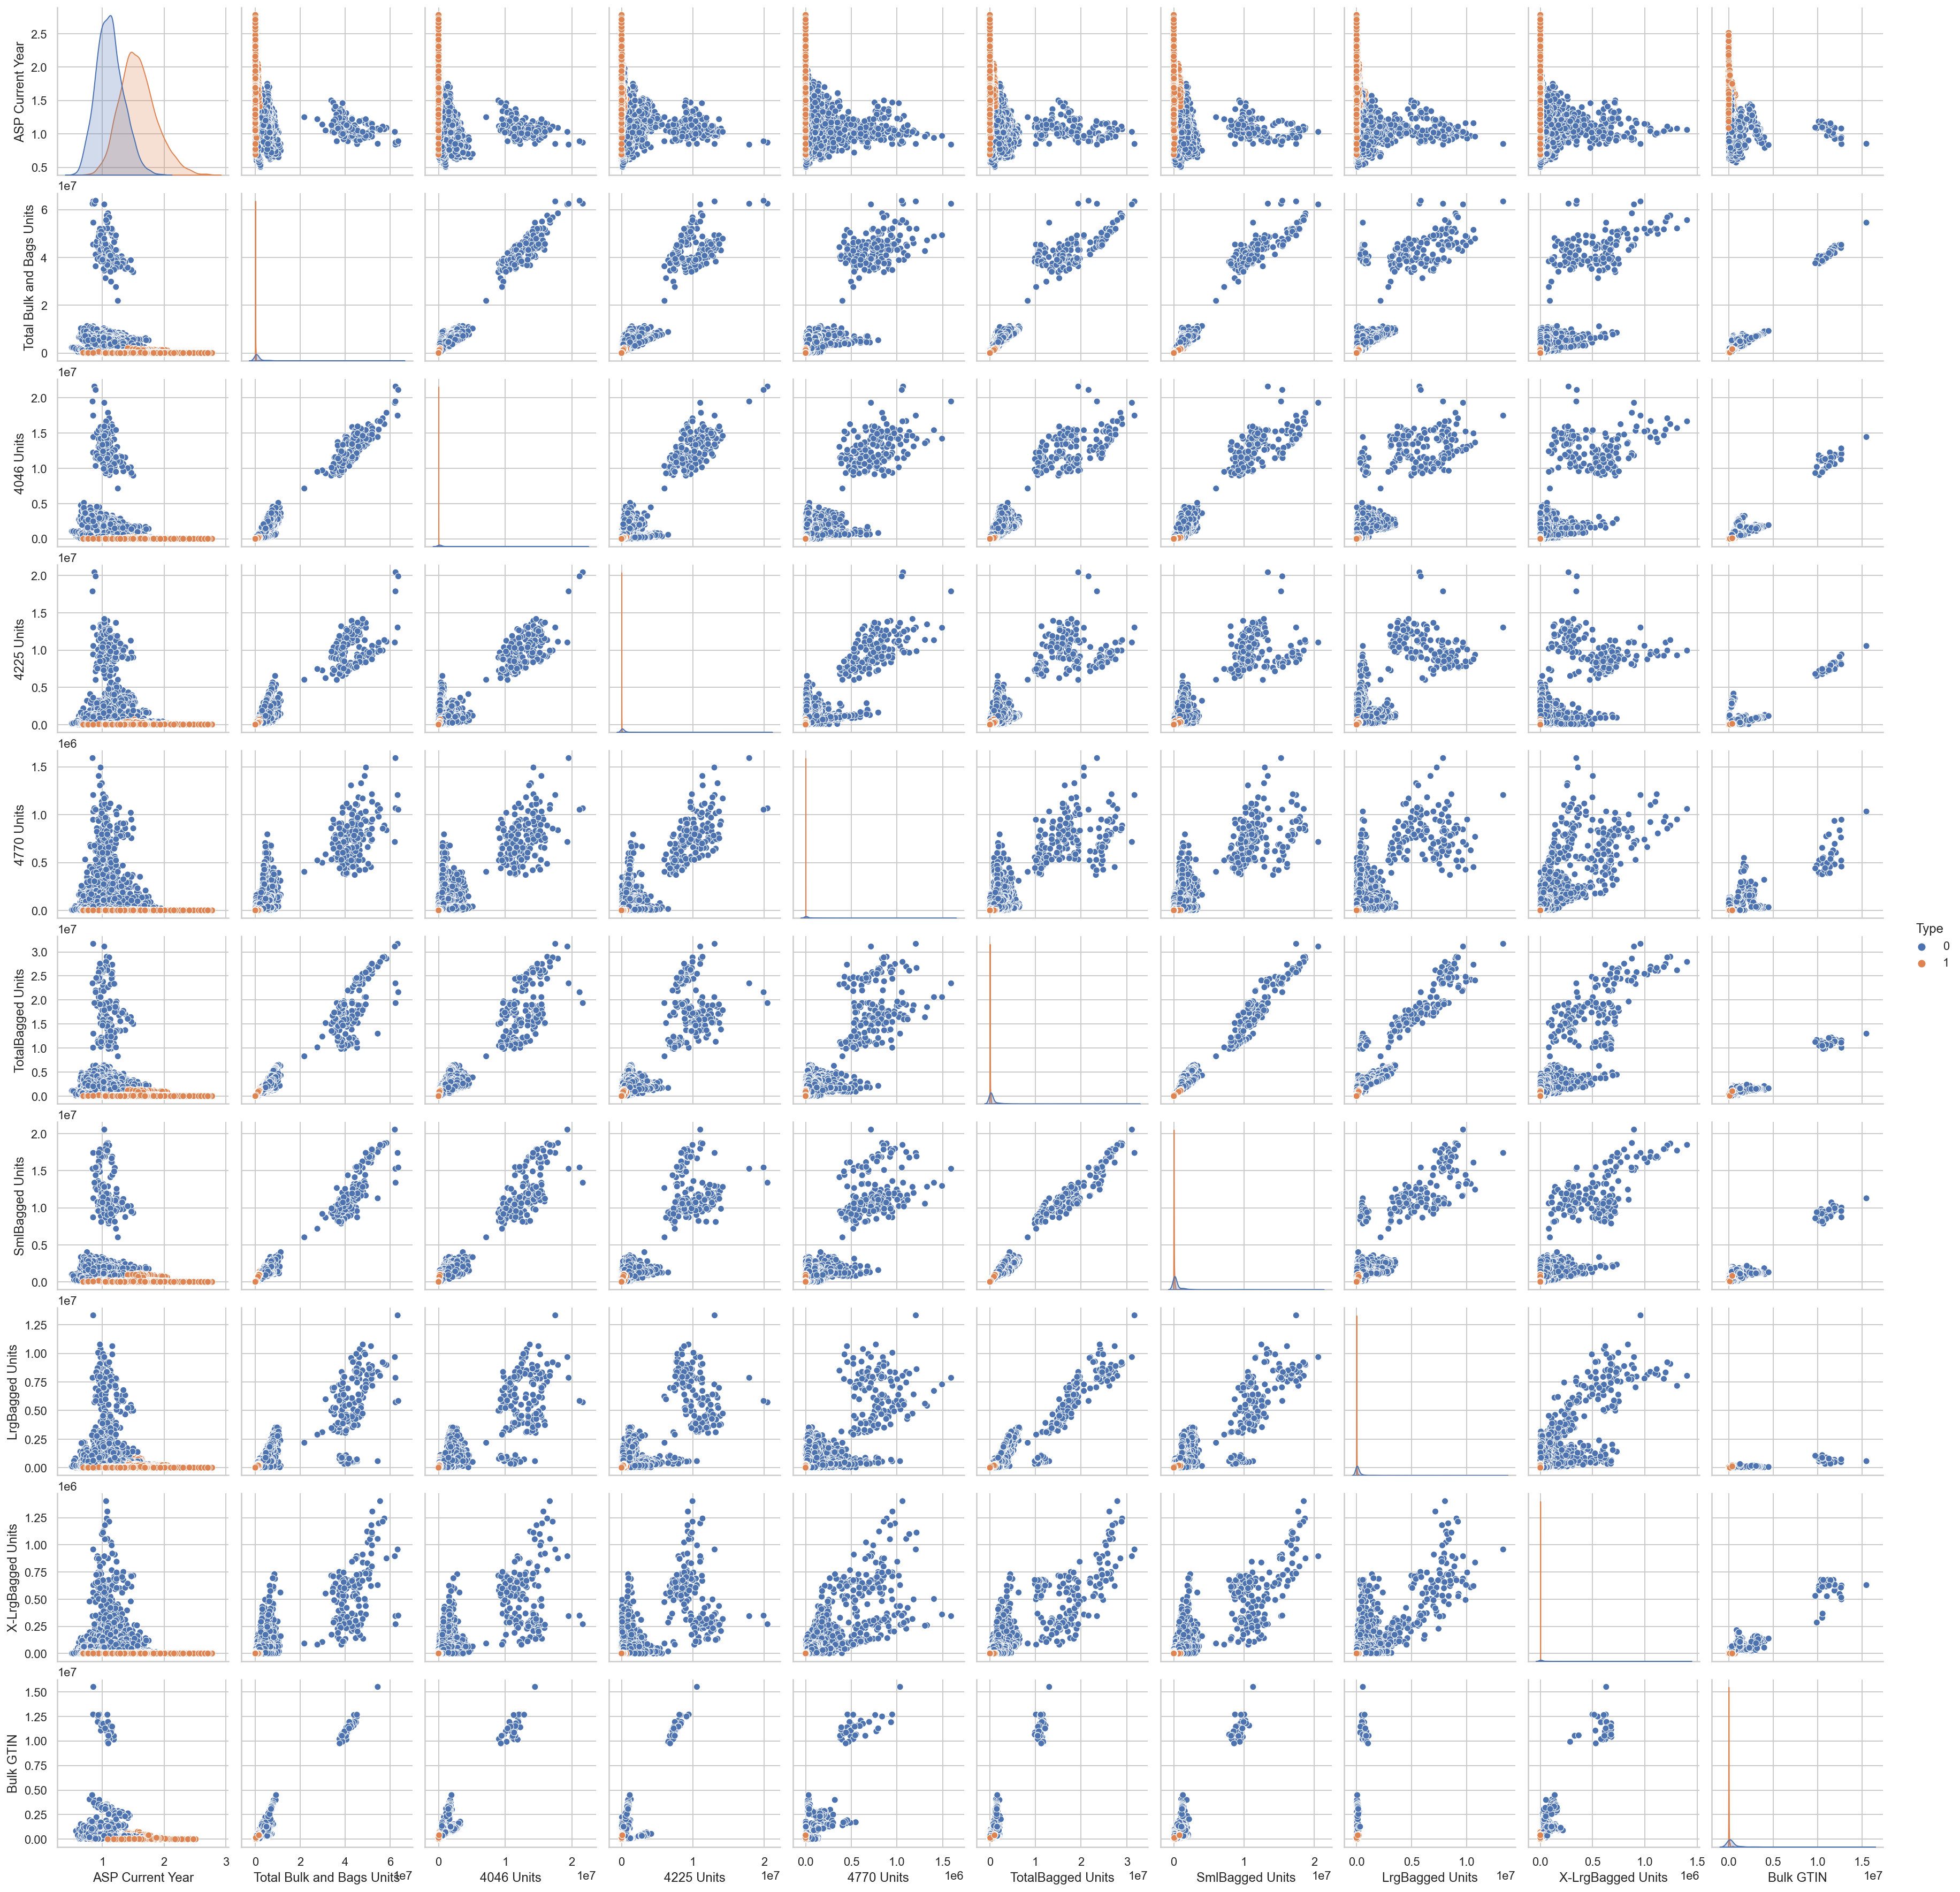

In [16]:
sns.pairplot(avocado, hue = 'Type')

In [17]:
avocado_dummies = avocado.copy()
avocado_dummies['Bulk GTIN'] = avocado_dummies['Bulk GTIN'].fillna(0)
avocado_dummies = avocado_dummies.drop(columns=['Timeframe'])
avocado_dummies

Geography Current Year Week Ending  Type  ASP Current Year  \
0                    Albany      2021-01-04 00:00:00     0          1.237368   
1                   Atlanta      2021-01-04 00:00:00     0          0.816395   
2      Baltimore/Washington      2021-01-04 00:00:00     0          1.039410   
3     Birmingham/Montgomery      2021-01-04 00:00:00     0          0.731857   
4                     Boise      2021-01-04 00:00:00     0          0.874298   
...                     ...                      ...   ...               ...   
5287              St. Louis      2018-12-02 00:00:00     1          1.700000   
5288               Syracuse      2018-12-02 00:00:00     1          1.250000   
5289                  Tampa      2018-12-02 00:00:00     1          1.290000   
5290                   West      2018-12-02 00:00:00     1          1.620000   
5291    West Tex/New Mexico      2018-12-02 00:00:00     1          1.690000   

      Total Bulk and Bags Units  4046 Units  4225 Units  4770 Units  \
0                     161850.33     7225.73   130204.01       76.41   
1                     780570.69   308199.17    45153.36       80.81   
2                    1006837.64   220482.26   282498.61     3749.76   
3                     348845.24   177970.28    12901.64       10.01   
4                     152240.40    39164.12    15398.73     1232.75   
...                         ...         ...         ...         ...   
5287                   10498.86     3932.18     1576.70       62.30   
5288                    4679.51       55.30      146.05        0.00   
5289                    7374.15      176.32        5.44        0.00   
5290                  268969.03    41309.81    53312.06      199.07   
5291                   16553.71     2495.29     3328.96        0.00   

      TotalBagged Units  SmlBagged Units  LrgBagged Units  X-LrgBagged Units  \
0              19476.68         16623.19          2633.40               0.00   
1             171244.48        156431.07         10715.51            2159.45   
2             413855.38        384221.35             3.15           19318.95   
3              93996.81         80416.64         11883.90            1260.49   
4              29772.49         24111.88            16.93             281.67   
...                 ...              ...              ...                ...   
5287            4927.68          3151.07          1776.61               0.00   
5288            4478.16          3028.69          1449.47               0.00   
5289            7192.39          7192.39             0.00               0.00   
5290          174148.09         87052.31         87095.78               0.00   
5291           10729.46          9803.18           926.28               0.00   

      Bulk GTIN  Year  
0       4867.50  2021  
1     255892.88  2021  
2      86251.63  2021  
3      63966.51  2021  
4      66672.30  2021  
...         ...   ...  
5287       0.00  2018  
5288       0.00  2018  
5289       0.00  2018  
5290       0.00  2018  
5291       0.00  2018  

[20340 rows x 14 columns]

In [18]:
avocado_dummies = pd.get_dummies(avocado_dummies, columns=['Geography'],drop_first=True)

In [19]:
avocado_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20340 entries, 0 to 5291
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Current Year Week Ending         20340 non-null  object 
 1   Type                             20340 non-null  int64  
 2   ASP Current Year                 20340 non-null  float64
 3   Total Bulk and Bags Units        20340 non-null  float64
 4   4046 Units                       20340 non-null  float64
 5   4225 Units                       20340 non-null  float64
 6   4770 Units                       20340 non-null  float64
 7   TotalBagged Units                20340 non-null  float64
 8   SmlBagged Units                  20340 non-null  float64
 9   LrgBagged Units                  20340 non-null  float64
 10  X-LrgBagged Units                20340 non-null  float64
 11  Bulk GTIN                        20340 non-null  float64
 12  Year               

In [20]:
col_names = ['Total Bulk and Bags Units','4046 Units','4225 Units',                   
 '4770 Units','TotalBagged Units','SmlBagged Units',              
 'LrgBagged Units',
 'X-LrgBagged Units']
features = avocado_dummies[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
avocado_dummies[col_names] = features

avocado_dummies.head()

Current Year Week Ending  Type  ASP Current Year  Total Bulk and Bags Units  \
0      2021-01-04 00:00:00     0          1.237368                  -0.212062   
1      2021-01-04 00:00:00     0          0.816395                  -0.070082   
2      2021-01-04 00:00:00     0          1.039410                  -0.018160   
3      2021-01-04 00:00:00     0          0.731857                  -0.169151   
4      2021-01-04 00:00:00     0          0.874298                  -0.214267   

   4046 Units  4225 Units  4770 Units  TotalBagged Units  SmlBagged Units  \
0   -0.226410   -0.112442   -0.213732          -0.236933        -0.241155   
1    0.003731   -0.194150   -0.213680          -0.155296        -0.126443   
2   -0.063342    0.033868   -0.170475          -0.024794         0.060459   
3   -0.095849   -0.225135   -0.214514          -0.196848        -0.188813   
4   -0.201988   -0.222736   -0.200115          -0.231394        -0.235011   

   LrgBagged Units  ...  Geography_Southeast  Geography_Spokane  \
0        -0.209778  ...                    0                  0   
1        -0.196844  ...                    0                  0   
2        -0.213988  ...                    0                  0   
3        -0.194974  ...                    0                  0   
4        -0.213966  ...                    0                  0   

  Geography_St. Louis  Geography_Syracuse  Geography_Tampa  Geography_Toledo  \
0                   0                   0                0                 0   
1                   0                   0                0                 0   
2                   0                   0                0                 0   
3                   0                   0                0                 0   
4                   0                   0                0                 0   

   Geography_Total U.S.  Geography_West  Geography_West Tex/New Mexico  \
0                     0               0                              0   
1                     0               0                              0   
2                     0               0                              0   
3                     0               0                              0   
4                     0               0                              0   

   Geography_Wichita  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 71 columns]

In [21]:
cols = avocado_dummies.columns.tolist()
cols = cols[1:] + cols[:1]
avocado_dummies = avocado_dummies[cols]
avocado_dummies
cols

['Type',
 'ASP Current Year',
 'Total Bulk and Bags Units',
 '4046 Units',
 '4225 Units',
 '4770 Units',
 'TotalBagged Units',
 'SmlBagged Units',
 'LrgBagged Units',
 'X-LrgBagged Units',
 'Bulk GTIN',
 'Year',
 'Geography_Atlanta',
 'Geography_Baltimore/Washington',
 'Geography_Birmingham/Montgomery',
 'Geography_Boise',
 'Geography_Boston',
 'Geography_Buffalo/Rochester',
 'Geography_California',
 'Geography_Charlotte',
 'Geography_Chicago',
 'Geography_Cincinnati/Dayton',
 'Geography_Columbus',
 'Geography_Dallas/Ft. Worth',
 'Geography_Denver',
 'Geography_Detroit',
 'Geography_Grand Rapids',
 'Geography_Great Lakes',
 'Geography_Harrisburg/Scranton',
 'Geography_Hartford/Springfield',
 'Geography_Houston',
 'Geography_Indianapolis',
 'Geography_Jacksonville',
 'Geography_Las Vegas',
 'Geography_Los Angeles',
 'Geography_Louisville',
 'Geography_Miami/Ft. Lauderdale',
 'Geography_Midsouth',
 'Geography_Nashville',
 'Geography_New Orleans/Mobile',
 'Geography_New York',
 'Geography

In [22]:
X1 = avocado_dummies[['Total Bulk and Bags Units','4046 Units','4225 Units','4770 Units',
                     'TotalBagged Units','SmlBagged Units','LrgBagged Units','X-LrgBagged Units','Bulk GTIN','Year',
                     'Geography_Atlanta','Geography_Baltimore/Washington','Geography_Birmingham/Montgomery','Geography_Boise',
                     'Geography_Boston','Geography_Buffalo/Rochester','Geography_California','Geography_Charlotte',
                     'Geography_Chicago','Geography_Cincinnati/Dayton','Geography_Columbus','Geography_Dallas/Ft. Worth',
                     'Geography_Denver','Geography_Detroit','Geography_Grand Rapids','Geography_Great Lakes',
                     'Geography_Harrisburg/Scranton','Geography_Hartford/Springfield','Geography_Houston','Geography_Indianapolis',
                     'Geography_Jacksonville','Geography_Las Vegas','Geography_Los Angeles','Geography_Louisville',
                     'Geography_Miami/Ft. Lauderdale','Geography_Midsouth','Geography_Nashville','Geography_New Orleans/Mobile',
                     'Geography_New York','Geography_Northeast','Geography_Northern New England','Geography_Orlando',
                     'Geography_Peoria/Springfield','Geography_Philadelphia','Geography_Phoenix/Tucson','Geography_Pittsburgh',
                     'Geography_Plains','Geography_Portland','Geography_Providence','Geography_Raleigh/Greensboro',
                     'Geography_Richmond/Norfolk','Geography_Roanoke','Geography_Sacramento','Geography_San Diego',
                     'Geography_San Francisco','Geography_Seattle','Geography_South Carolina',
                     'Geography_South Central','Geography_Southeast','Geography_Spokane','Geography_St. Louis',
                     'Geography_Syracuse','Geography_Tampa','Geography_Toledo','Geography_Total U.S.',
                     'Geography_West','Geography_West Tex/New Mexico','Geography_Wichita','Type']]
X1.rename(columns={'Type':'Type_Pred'}, inplace=True)
y1 = avocado_dummies["ASP Current Year"]
X_train, X_holdout, y_train, y_holdout = train_test_split(X1, y1, test_size = .25, random_state=15)

/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
X = avocado_dummies.loc[:,'ASP Current Year':'X-LrgBagged Units']
y = avocado_dummies["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [24]:
k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

[0.9954525067616646, 0.9942850530588698, 0.9942848265374387, 0.993731774463182, 0.9929945227117939, 0.9925028579453903, 0.9918883808097085, 0.9914582166118736, 0.9902291113262226, 0.9903520369562164, 0.9890615066091403, 0.9891230071777091, 0.98801678976848, 0.988139677644902, 0.9871564613728104, 0.9869721106813916, 0.9863575957921379, 0.986234632408572, 0.9856200797657465, 0.9856201175193184, 0.9845754384322302, 0.9848826392464991, 0.9840836981586827, 0.9841451232201079, 0.983223445270157, 0.9830391323323099, 0.9827317805037534, 0.9830390945787381, 0.982301540798775, 0.9819943022309341]


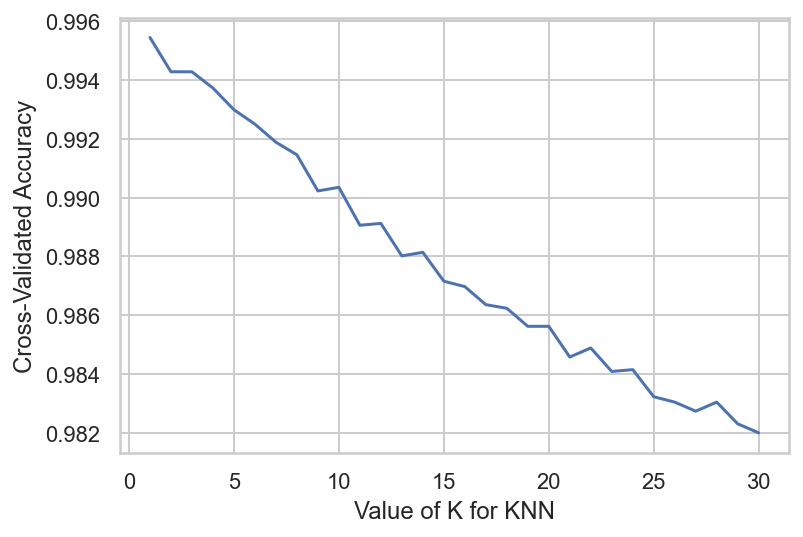

In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print(k_scores);

From this I can see that n_neighbors = 1 will give me the most accurate model for kNN

# Fit a kNN model using n_neighbors = 1

The score for kNN is
Training: 100.00%
Test set:  99.36%


''

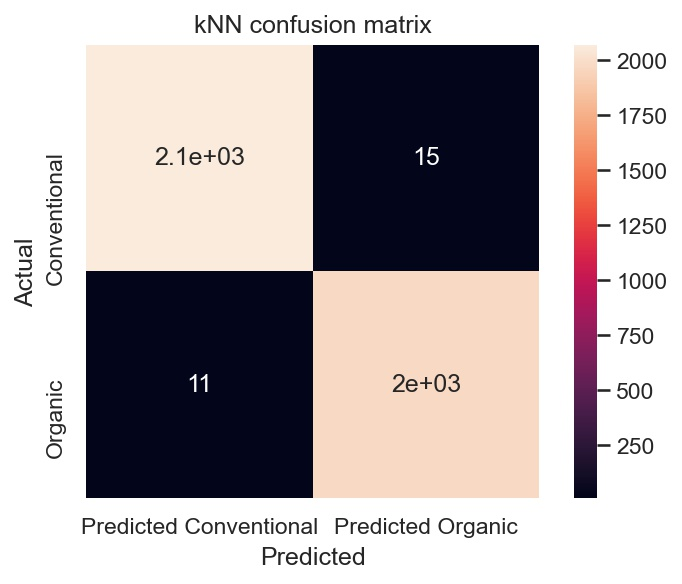

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
knn_confusion = pd.DataFrame(confusion_matrix(y_test, knn.predict(X_test)))
knn_confusion.index = ['Conventional','Organic']
knn_confusion.columns = ['Predicted Conventional','Predicted Organic']
plt.figure(dpi=150)
sns.color_palette("rocket")
sns.heatmap(knn_confusion, annot=True, square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix')
plt.savefig("kNN_confusion_matrix", transparent=True)
;

# Fit and test a logisitic regression model

/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

The score for Logistic Regression is
Training:  98.50%
Test set:  98.21%
Logistic Regression Coefficents [[   8.23989585  -37.21911751 -210.02282024  -69.45268404  -19.70331522
    38.57873854   68.64991013  -15.53088343  -59.1300155 ]]
Logistic Regression Intercept [-74.19452799]


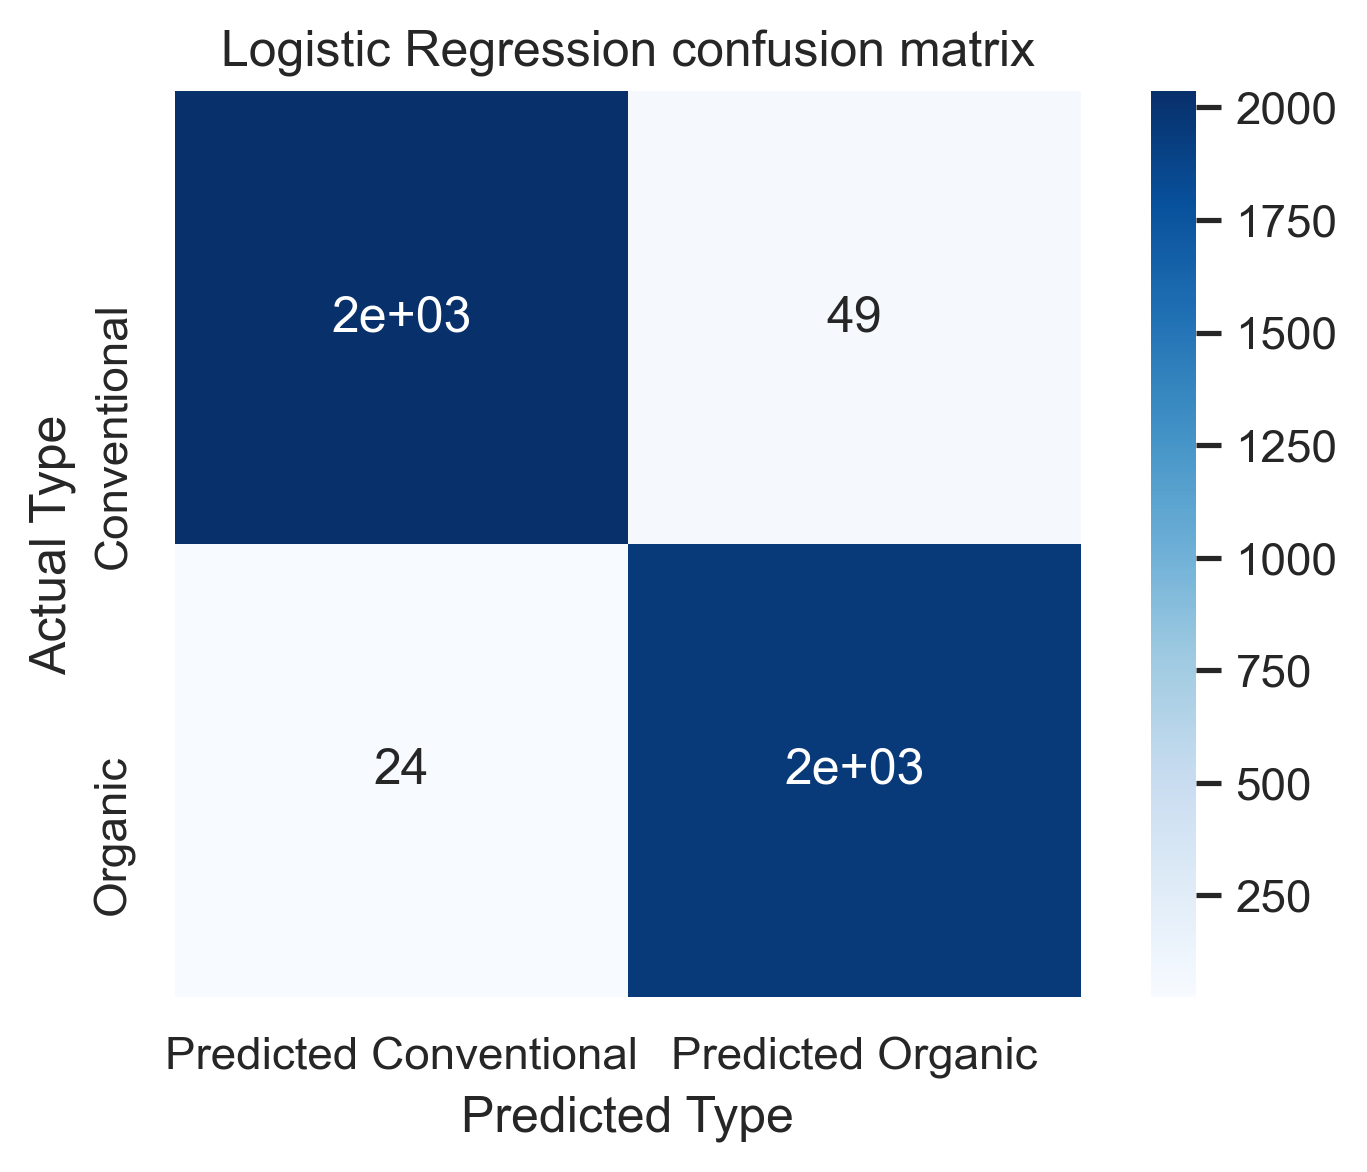

In [27]:
lr = LogisticRegression(penalty = 'none')
lr.fit(X_train, y_train)

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

print("The score for Logistic Regression is")
print("Training: {:6.2f}%".format(100*lr.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*lr.score(X_test, y_test)))



lr_confusion = pd.DataFrame(confusion_matrix(y_test, lr.predict(X_test)))
lr_confusion.index = ['Conventional','Organic']
lr_confusion.columns = ['Predicted Conventional','Predicted Organic']

plt.figure(dpi=150)
sns.heatmap(lr_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Logistic Regression confusion matrix')
plt.savefig("lr_confusion_matrix");


print("Logistic Regression Coefficents", lr.coef_)
print ("Logistic Regression Intercept", lr.intercept_)

# Fit and test a Decision Tree Model

The score for Decision Tree is
Training:  98.09%
Test set:  98.01%


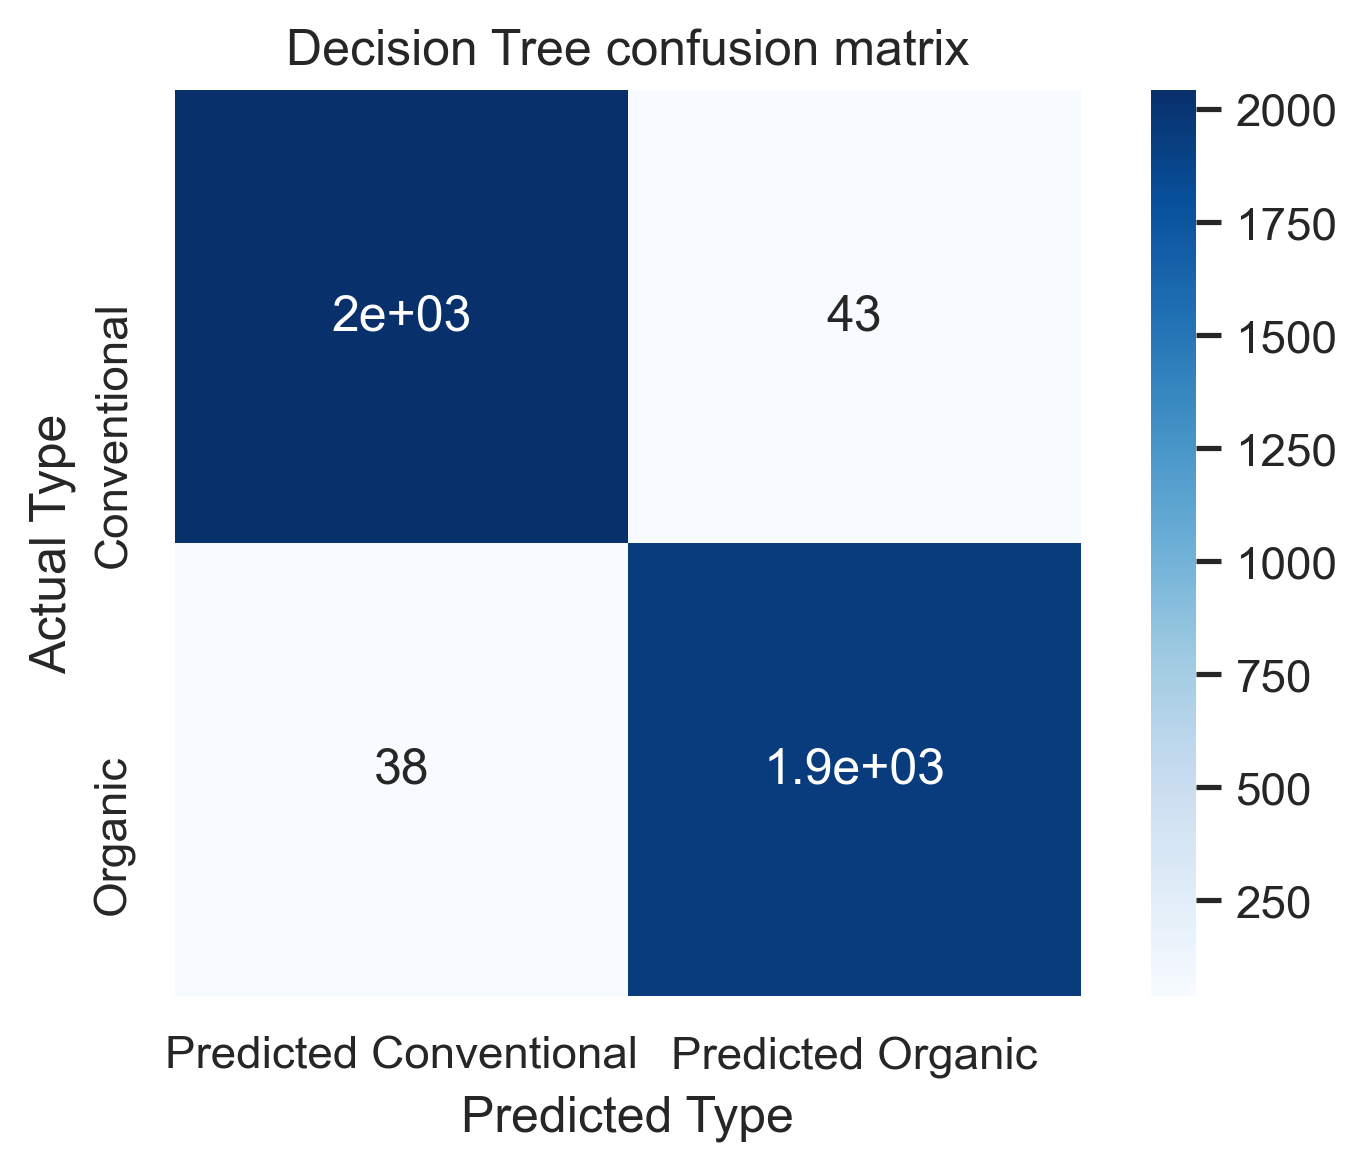

In [28]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train, y_train)

decisiontree.fit(X_train, y_train)
decisiontree.score(X_train, y_train)

print("The score for Decision Tree is")
print("Training: {:6.2f}%".format(100*decisiontree.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*decisiontree.score(X_test, y_test)))



dt_confusion = pd.DataFrame(confusion_matrix(y_test, decisiontree.predict(X_test)))
dt_confusion.index = ['Conventional','Organic']
dt_confusion.columns = ['Predicted Conventional','Predicted Organic']
plt.figure(dpi=150)
sns.heatmap(dt_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Decision Tree confusion matrix')
plt.savefig("dt_confusion_matrix");

# Fit and test a Random Forest model 

The score for Random Forest is
Training: 100.000%
Test set: 99.730%


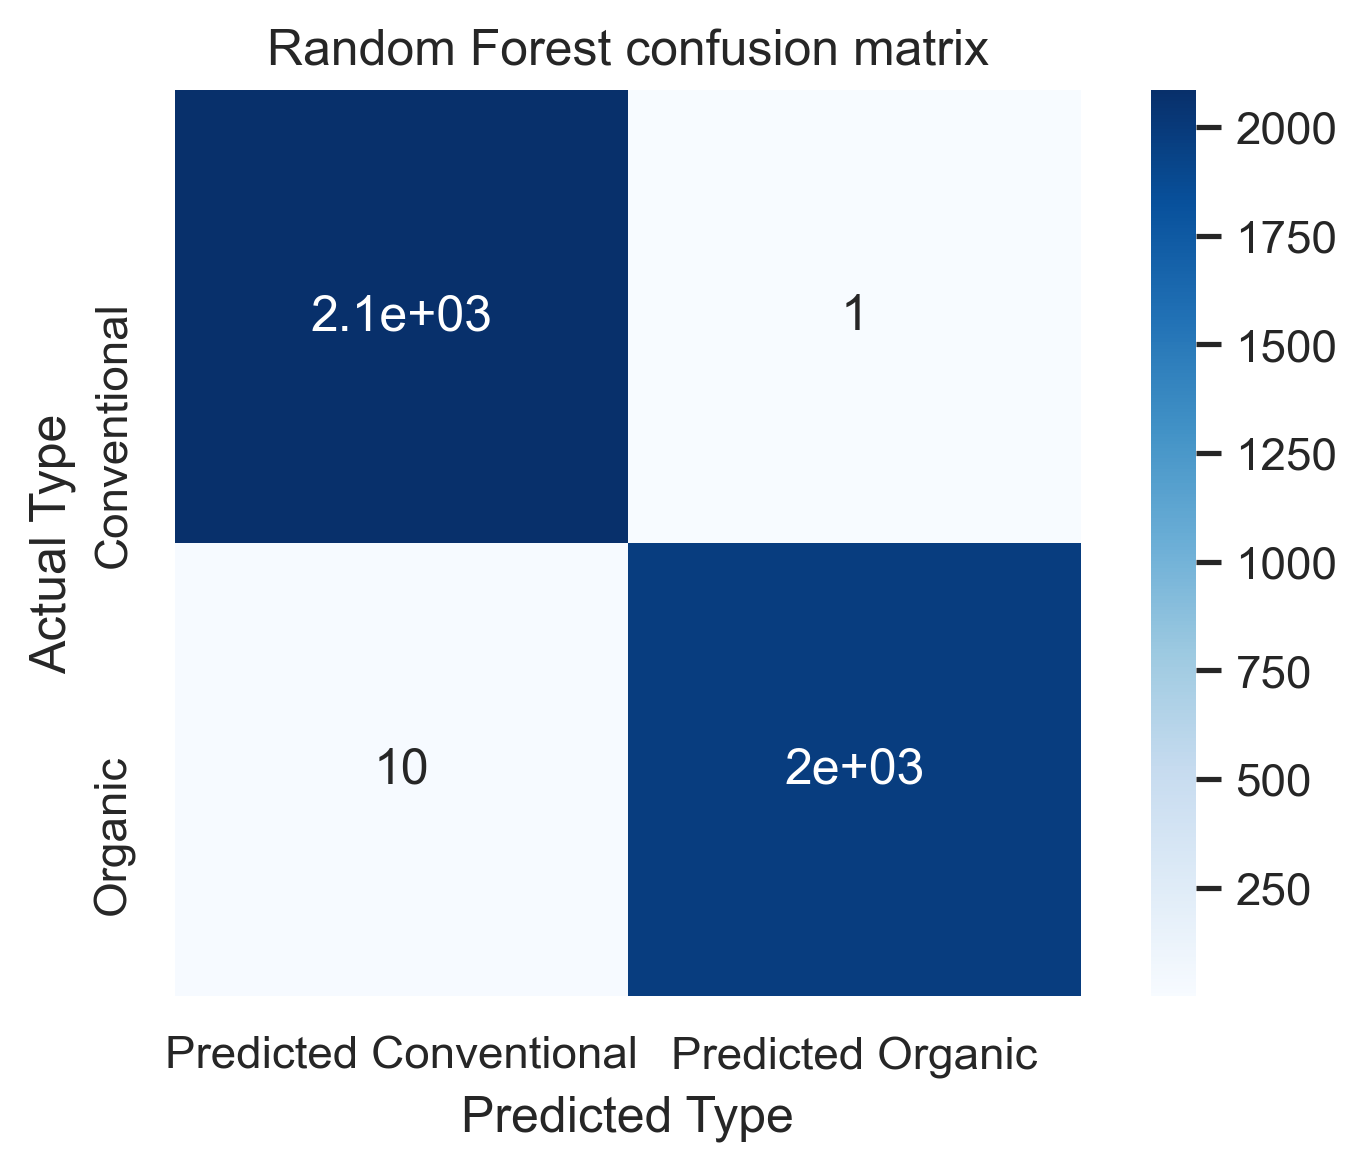

In [29]:
randomforest = RandomForestClassifier(n_estimators=100, random_state = 42)
randomforest.fit(X_train, y_train)

randomforest.fit(X_train, y_train)
randomforest.score(X_train, y_train)

print("The score for Random Forest is")
print("Training: {:6.3f}%".format(100*randomforest.score(X_train, y_train)))
print("Test set: {:6.3f}%".format(100*randomforest.score(X_test, y_test)))


feature_names = [['ASP Current Year','Total Bulk and Bags Units','4046 Units','4225 Units','4770 Units',
                        'TotalBagged Units','SmlBagged Units','LrgBagged Units','X-LrgBagged Units']]
rf_confusion = pd.DataFrame(confusion_matrix(y_test, randomforest.predict(X_test)))
rf_confusion.index = ['Conventional','Organic']
rf_confusion.columns = ['Predicted Conventional','Predicted Organic']
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Random Forest confusion matrix')
plt.savefig("rf_confusion_matrix");

In [30]:
import time
import numpy as np

start_time = time.time()
importances = randomforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


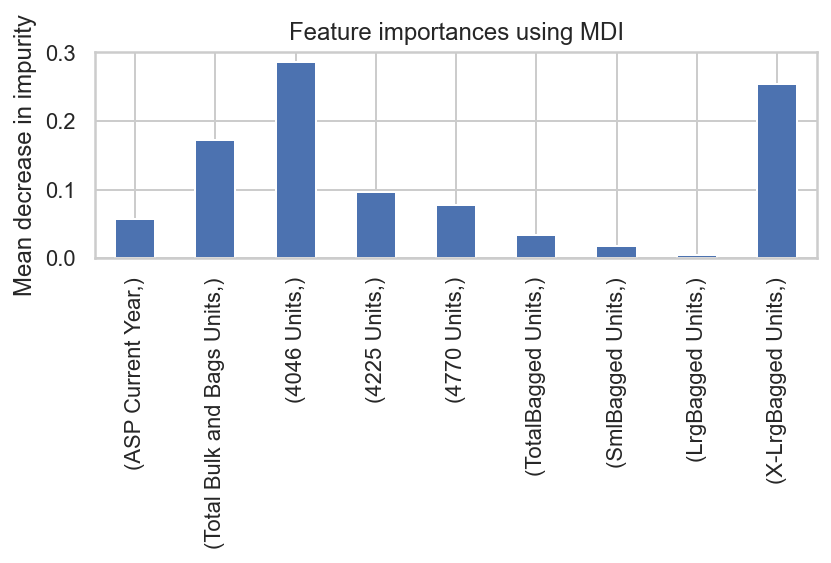

In [31]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Average Voting

In [32]:
voting_classifer = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('kNN', KNeighborsClassifier()),
                             ('randomforest',
                              RandomForestClassifier(random_state=42)),
                             ('decisiontree',
                              DecisionTreeClassifier(random_state=42))],
                                    voting='soft',
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9975417895771878

# Average Voting

In [33]:
voting_classifer2 = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('kNN', KNeighborsClassifier()),
                             ('randomforest',
                              RandomForestClassifier(random_state=42)),
                             ('decisiontree',
                              DecisionTreeClassifier(random_state=42))],
                                    voting='hard',
                                    n_jobs=-1)
voting_classifer2.fit(X_train, y_train)

y_pred = voting_classifer2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9965585054080629

# Weighted Voting

In [34]:
weights = [1.5,3.8,4.2,2.2]
voting_model = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('kNN', KNeighborsClassifier()),
                             ('randomforest',
                              RandomForestClassifier(random_state=42)),
                             ('decisiontree',
                              DecisionTreeClassifier(random_state=42))],
                                    voting='soft',
                                    weights = weights, 
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9972959685349065

After using voting methods Random Forests is still the best Classification Model for our problem

The score for Stacked Classifier is
Training: 100.000%
Test set: 99.705%


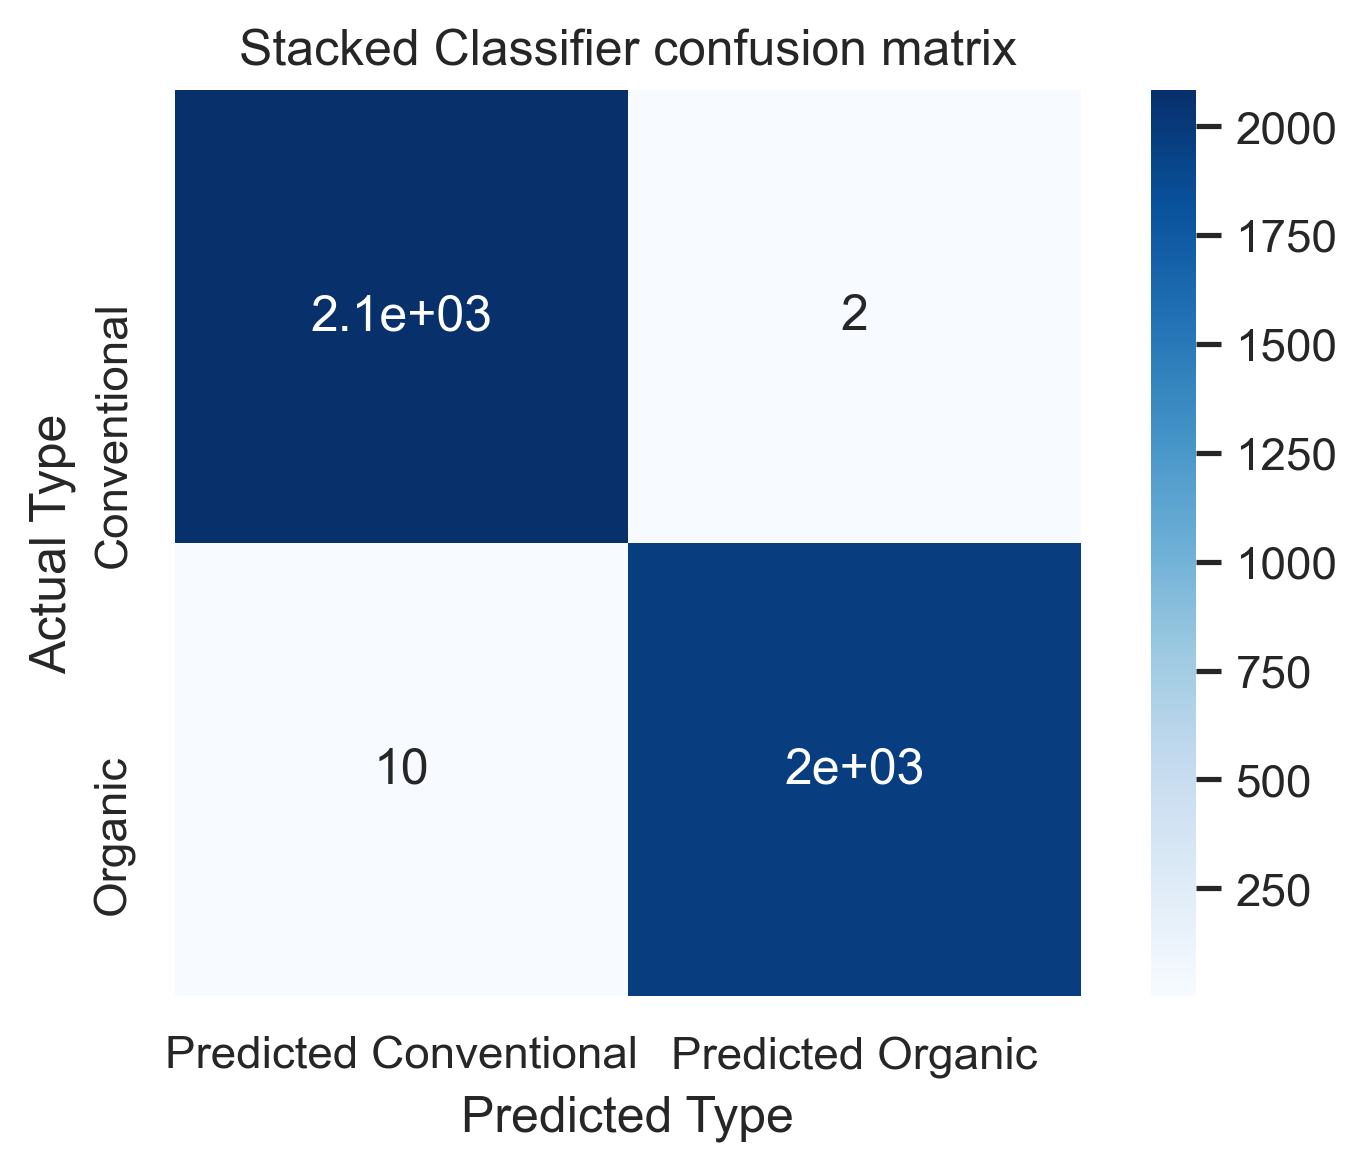

In [35]:
stacked = StackingClassifier(
    classifiers=[LogisticRegression(random_state=42),
                             KNeighborsClassifier(),
                              RandomForestClassifier(random_state=42),
                              DecisionTreeClassifier(random_state=42)],
    meta_classifier=LogisticRegression(), use_probas=False)

stacked.fit(X_train, y_train)
y_pred = stacked.predict(X_test)
      
print("The score for Stacked Classifier is")
print("Training: {:6.3f}%".format(100*stacked.score(X_train, y_train)))
print("Test set: {:6.3f}%".format(100*stacked.score(X_test, y_test)))



stacked_confusion = pd.DataFrame(confusion_matrix(y_test, stacked.predict(X_test)))
stacked_confusion.index = ['Conventional','Organic']
stacked_confusion.columns = ['Predicted Conventional','Predicted Organic']
plt.figure(dpi=150)
sns.heatmap(stacked_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Stacked Classifier confusion matrix')
plt.savefig("stacked_confusion_matrix");

The score for Gradient Boosted Models is
Training: 99.957%
Test set: 99.779%


/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py

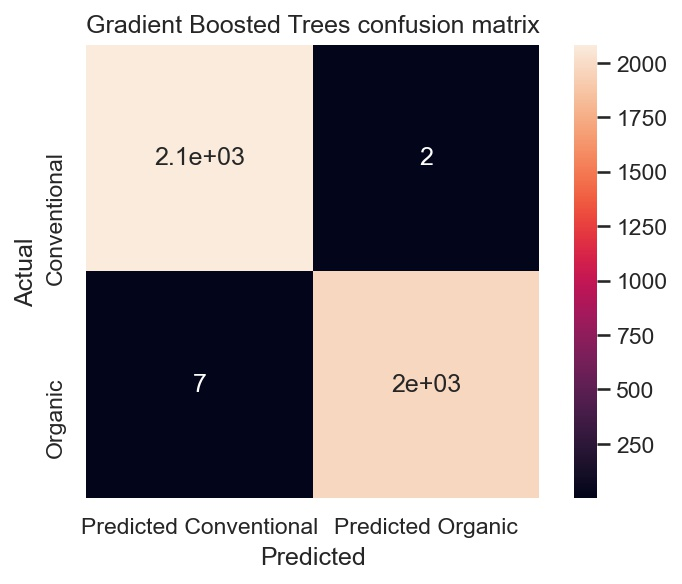

In [74]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', 
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8, use_label_encoder=False
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=50,
                    verbose=False
                   )
print("The score for Gradient Boosted Models is")
print("Training: {:6.3f}%".format(100*accuracy_score(y_train, gbm.predict(X_train, ntree_limit=gbm.best_ntree_limit))))
print("Test set: {:6.3f}%".format(100*accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))))

gbm_confusion = pd.DataFrame(confusion_matrix(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)))
gbm_confusion.index = ['Conventional','Organic']
gbm_confusion.columns = ['Predicted Conventional','Predicted Organic']
plt.figure(dpi=150)
sns.color_palette("rocket")
sns.heatmap(gbm_confusion, annot=True, square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosted Trees confusion matrix')
plt.savefig("gbtrees_matrix", transparent=True);

In [76]:
gbm_importances = pd.Series(gbm.feature_importances_, index=feature_names)

print(gbm.feature_importances_)
# plot

fig, ax = plt.subplots()
#sns.barplot(gbm_importances)
gbm_importances.plot.bar()
ax.set_title("Feature Importances")
ax.set_ylabel("Importance Scores")
fig.tight_layout()

ValueError: Length of values (9) does not match length of index (69)

[0.05288892 0.10357331 0.17259187 0.04627948 0.03284451 0.01201746
 0.01391945 0.0038367  0.5620483 ]


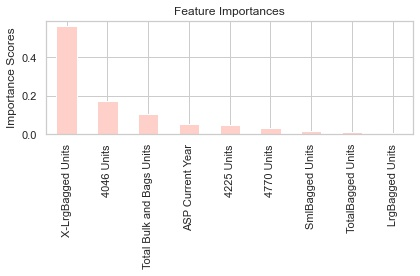

In [84]:


feature_names2=X_train.columns.values.tolist()
gbm_importances = pd.Series(gbm.feature_importances_, index=feature_names2)
gbm_importances = (gbm_importances.sort_values(ascending=False))

print(gbm.feature_importances_)
# plot

fig, ax = plt.subplots()
gbm_importances.plot.bar(color='#ffcfca')
#sns.barplot(gbm_importances)
ax.set_title("Feature Importances")
ax.set_ylabel("Importance Scores")
fig.tight_layout()
plt.savefig("gbtrees_Featureimportances");

# Starting Linear Regression Model For Price Prediction

I am going to create a data frame that I will use to predict the price, I am going to drop the given Type column and then use my Gradient Boosted Model to recreate that coulmn. This way the existing error carries over to my regression model so that I am able to get a true error rate

In [38]:
avocado_pricepred = avocado_dummies.copy()
avocado_pricepred.head()

Type  ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0     0          1.237368                  -0.212062   -0.226410   -0.112442   
1     0          0.816395                  -0.070082    0.003731   -0.194150   
2     0          1.039410                  -0.018160   -0.063342    0.033868   
3     0          0.731857                  -0.169151   -0.095849   -0.225135   
4     0          0.874298                  -0.214267   -0.201988   -0.222736   

   4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0   -0.213732          -0.236933        -0.241155        -0.209778   
1   -0.213680          -0.155296        -0.126443        -0.196844   
2   -0.170475          -0.024794         0.060459        -0.213988   
3   -0.214514          -0.196848        -0.188813        -0.194974   
4   -0.200115          -0.231394        -0.235011        -0.213966   

   X-LrgBagged Units  ...  Geography_Spokane Geography_St. Louis  \
0          -0.198706  ...                  0                   0   
1          -0.165503  ...                  0                   0   
2           0.098338  ...                  0                   0   
3          -0.179325  ...                  0                   0   
4          -0.194375  ...                  0                   0   

   Geography_Syracuse  Geography_Tampa  Geography_Toledo  \
0                   0                0                 0   
1                   0                0                 0   
2                   0                0                 0   
3                   0                0                 0   
4                   0                0                 0   

   Geography_Total U.S.  Geography_West  Geography_West Tex/New Mexico  \
0                     0               0                              0   
1                     0               0                              0   
2                     0               0                              0   
3                     0               0                              0   
4                     0               0                              0   

   Geography_Wichita  Current Year Week Ending  
0                  0       2021-01-04 00:00:00  
1                  0       2021-01-04 00:00:00  
2                  0       2021-01-04 00:00:00  
3                  0       2021-01-04 00:00:00  
4                  0       2021-01-04 00:00:00  

[5 rows x 71 columns]

In [39]:
avocado_pricepred = avocado_pricepred.drop(columns=['Type'])
avocado_pricepred = avocado_pricepred.drop(columns=['Current Year Week Ending'])
avocado_pricepred

ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0             1.237368                  -0.212062   -0.226410   -0.112442   
1             0.816395                  -0.070082    0.003731   -0.194150   
2             1.039410                  -0.018160   -0.063342    0.033868   
3             0.731857                  -0.169151   -0.095849   -0.225135   
4             0.874298                  -0.214267   -0.201988   -0.222736   
...                ...                        ...         ...         ...   
5287          1.700000                  -0.246793   -0.228928   -0.236015   
5288          1.250000                  -0.248128   -0.231893   -0.237389   
5289          1.290000                  -0.247510   -0.231800   -0.237524   
5290          1.620000                  -0.187481   -0.200347   -0.186312   
5291          1.690000                  -0.245403   -0.230027   -0.234331   

      4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0      -0.213732          -0.236933        -0.241155        -0.209778   
1      -0.213680          -0.155296        -0.126443        -0.196844   
2      -0.170475          -0.024794         0.060459        -0.213988   
3      -0.214514          -0.196848        -0.188813        -0.194974   
4      -0.200115          -0.231394        -0.235011        -0.213966   
...          ...                ...              ...              ...   
5287   -0.213898          -0.244759        -0.252209        -0.211150   
5288   -0.214632          -0.245000        -0.252310        -0.211673   
5289   -0.214632          -0.243540        -0.248893        -0.213993   
5290   -0.212288          -0.153734        -0.183368        -0.074605   
5291   -0.214632          -0.241638        -0.246751        -0.212510   

      X-LrgBagged Units  Bulk GTIN  ... Geography_Southeast  \
0             -0.198706    4867.50  ...                   0   
1             -0.165503  255892.88  ...                   0   
2              0.098338   86251.63  ...                   0   
3             -0.179325   63966.51  ...                   0   
4             -0.194375   66672.30  ...                   0   
...                 ...        ...  ...                 ...   
5287          -0.198706       0.00  ...                   0   
5288          -0.198706       0.00  ...                   0   
5289          -0.198706       0.00  ...                   0   
5290          -0.198706       0.00  ...                   0   
5291          -0.198706       0.00  ...                   0   

      Geography_Spokane  Geography_St. Louis  Geography_Syracuse  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0                   0   
4                     0                    0                   0   
...                 ...                  ...                 ...   
5287                  0                    1                   0   
5288                  0                    0                   1   
5289                  0                    0                   0   
5290                  0                    0                   0   
5291                  0                    0                   0   

      Geography_Tampa  Geography_Toledo  Geography_Total U.S.  Geography_West  \
0                   0                 0                     0               0   
1                   0                 0                     0               0   
2                   0                 0                     0               0   
3                   0                 0                     0               0   
4                   0                 0                     0               0   
...               ...               ...                   ...             ...   
5287                0                 0                     0  

In [40]:
avocado_pricepred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20340 entries, 0 to 5291
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ASP Current Year                 20340 non-null  float64
 1   Total Bulk and Bags Units        20340 non-null  float64
 2   4046 Units                       20340 non-null  float64
 3   4225 Units                       20340 non-null  float64
 4   4770 Units                       20340 non-null  float64
 5   TotalBagged Units                20340 non-null  float64
 6   SmlBagged Units                  20340 non-null  float64
 7   LrgBagged Units                  20340 non-null  float64
 8   X-LrgBagged Units                20340 non-null  float64
 9   Bulk GTIN                        20340 non-null  float64
 10  Year                             20340 non-null  object 
 11  Geography_Atlanta                20340 non-null  uint8  
 12  Geography_Baltimore

In [41]:
X_fill = avocado_pricepred.loc[:,'ASP Current Year':'X-LrgBagged Units']
type_pred = gbm.predict(X_fill)
avocado_pricepred['Type_Pred'] = type_pred
avocado_pricepred.head()

/Users/emilyubbelohde/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


ASP Current Year  Total Bulk and Bags Units  4046 Units  4225 Units  \
0          1.237368                  -0.212062   -0.226410   -0.112442   
1          0.816395                  -0.070082    0.003731   -0.194150   
2          1.039410                  -0.018160   -0.063342    0.033868   
3          0.731857                  -0.169151   -0.095849   -0.225135   
4          0.874298                  -0.214267   -0.201988   -0.222736   

   4770 Units  TotalBagged Units  SmlBagged Units  LrgBagged Units  \
0   -0.213732          -0.236933        -0.241155        -0.209778   
1   -0.213680          -0.155296        -0.126443        -0.196844   
2   -0.170475          -0.024794         0.060459        -0.213988   
3   -0.214514          -0.196848        -0.188813        -0.194974   
4   -0.200115          -0.231394        -0.235011        -0.213966   

   X-LrgBagged Units  Bulk GTIN  ... Geography_Spokane  Geography_St. Louis  \
0          -0.198706    4867.50  ...                 0                    0   
1          -0.165503  255892.88  ...                 0                    0   
2           0.098338   86251.63  ...                 0                    0   
3          -0.179325   63966.51  ...                 0                    0   
4          -0.194375   66672.30  ...                 0                    0   

   Geography_Syracuse  Geography_Tampa  Geography_Toledo  \
0                   0                0                 0   
1                   0                0                 0   
2                   0                0                 0   
3                   0                0                 0   
4                   0                0                 0   

   Geography_Total U.S.  Geography_West  Geography_West Tex/New Mexico  \
0                     0               0                              0   
1                     0               0                              0   
2                     0               0                              0   
3                     0               0                              0   
4                     0               0                              0   

   Geography_Wichita  Type_Pred  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  

[5 rows x 70 columns]

In [42]:
avocado_pricepred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20340 entries, 0 to 5291
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ASP Current Year                 20340 non-null  float64
 1   Total Bulk and Bags Units        20340 non-null  float64
 2   4046 Units                       20340 non-null  float64
 3   4225 Units                       20340 non-null  float64
 4   4770 Units                       20340 non-null  float64
 5   TotalBagged Units                20340 non-null  float64
 6   SmlBagged Units                  20340 non-null  float64
 7   LrgBagged Units                  20340 non-null  float64
 8   X-LrgBagged Units                20340 non-null  float64
 9   Bulk GTIN                        20340 non-null  float64
 10  Year                             20340 non-null  object 
 11  Geography_Atlanta                20340 non-null  uint8  
 12  Geography_Baltimore

In [53]:
X2 = avocado_pricepred.loc[:,'Total Bulk and Bags Units':'Type_Pred']
y2 = avocado_pricepred["ASP Current Year"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .2, random_state=42)
X_train2, X_val, y_train2, y_val = train_test_split(X_train2, y_train2, test_size=.25, random_state=3)

In [54]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12204 entries, 4085 to 3879
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Total Bulk and Bags Units        12204 non-null  float64
 1   4046 Units                       12204 non-null  float64
 2   4225 Units                       12204 non-null  float64
 3   4770 Units                       12204 non-null  float64
 4   TotalBagged Units                12204 non-null  float64
 5   SmlBagged Units                  12204 non-null  float64
 6   LrgBagged Units                  12204 non-null  float64
 7   X-LrgBagged Units                12204 non-null  float64
 8   Bulk GTIN                        12204 non-null  float64
 9   Year                             12204 non-null  object 
 10  Geography_Atlanta                12204 non-null  uint8  
 11  Geography_Baltimore/Washington   12204 non-null  uint8  
 12  Geography_Birmin

In [55]:
y_train2.head()

4085    1.380000
1274    1.356535
3769    1.750000
4807    0.850000
2027    1.420000
Name: ASP Current Year, dtype: float64

In [56]:
len(y_train2)

12204

In [57]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train2.values)
#X_val_scaled = scaler.transform(X_val.values)
#X_test_scaled = scaler.transform(X_test2.values)

lm_reg = Ridge(alpha=1)

lasso_reg = Lasso(alpha=.01)

en_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)

rf_reg = RandomForestRegressor(random_state = 42)

gbt_reg = GradientBoostingRegressor(random_state = 42)


In [58]:
#validate
print('Using all features')
lm.fit(X_train2, y_train2)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train2, y_train2)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val, y_val):.3f}')

lasso_reg.fit(X_train2, y_train2)
print(f'Lasso Regression val R^2: {lasso_reg.score(X_val, y_val):.3f}')

en_reg.fit(X_train2, y_train2)
print(f'Elastic Net Regression val R^2: {en_reg.score(X_val, y_val):.3f}')

rf_reg.fit(X_train2, y_train2)
print(f'Random Forest Regression val R^2: {rf_reg.score(X_val, y_val):.3f}')

gbt_reg.fit(X_train2, y_train2)
print(f'Gradient Boosting Tree Regression val R^2: {gbt_reg.score(X_val, y_val):.3f}')

Using all features
Linear Regression val R^2: 0.642
Ridge Regression val R^2: 0.641
Lasso Regression val R^2: 0.439
Elastic Net Regression val R^2: 0.005
Random Forest Regression val R^2: 0.848
Gradient Boosting Tree Regression val R^2: 0.709


In [59]:
X3 = avocado_pricepred.loc[:,'Total Bulk and Bags Units':'Bulk GTIN']
y3 = avocado_pricepred["ASP Current Year"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = .2, random_state=42)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=.25, random_state=3)

print('Excluding Geography')

lm.fit(X_train3, y_train3)
print(f'Linear Regression val R^2: {lm.score(X_val3, y_val3):.3f}')

lm_reg.fit(X_train3, y_train3)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val3, y_val3):.3f}')

lasso_reg.fit(X_train3, y_train3)
print(f'Lasso Regression val R^2: {lasso_reg.score(X_val3, y_val3):.3f}')

en_reg.fit(X_train3, y_train3)
print(f'Elastic Net Regression val R^2: {en_reg.score(X_val3, y_val3):.3f}')

rf_reg.fit(X_train3, y_train3)
print(f'Random Forest Regression val R^2: {rf_reg.score(X_val3, y_val3):.3f}')

gbt_reg.fit(X_train3, y_train3)
print(f'Gradient Boosting Tree Regression val R^2: {gbt_reg.score(X_val3, y_val3):.3f}')

Excluding Geography
Linear Regression val R^2: 0.050
Ridge Regression val R^2: 0.050
Lasso Regression val R^2: 0.038
Elastic Net Regression val R^2: 0.005
Random Forest Regression val R^2: 0.786
Gradient Boosting Tree Regression val R^2: 0.635


In [60]:
X4 = avocado_pricepred.loc[:,'Total Bulk and Bags Units':'X-LrgBagged Units']
y4 = avocado_pricepred["ASP Current Year"]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = .2, random_state=42)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=.25, random_state=3)

print('Excluding Geography and Bulk GTIN')

lm.fit(X_train4, y_train4)
print(f'Linear Regression val R^2: {lm.score(X_val4, y_val4):.3f}')

lm_reg.fit(X_train4, y_train4)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val4, y_val4):.3f}')

lasso_reg.fit(X_train4, y_train4)
print(f'Lasso Regression val R^2: {lasso_reg.score(X_val4, y_val4):.3f}')

en_reg.fit(X_train4, y_train4)
print(f'Elastic Net Regression val R^2: {en_reg.score(X_val4, y_val4):.3f}')

rf_reg.fit(X_train4, y_train4)
print(f'Random Forest Regression val R^2: {rf_reg.score(X_val4, y_val4):.3f}')

gbt_reg.fit(X_train4, y_train4)
print(f'Gradient Boosting Tree Regression val R^2: {gbt_reg.score(X_val4, y_val4):.3f}')

Excluding Geography and Bulk GTIN
Linear Regression val R^2: 0.050
Ridge Regression val R^2: 0.050
Lasso Regression val R^2: 0.039
Elastic Net Regression val R^2: -0.000
Random Forest Regression val R^2: 0.780
Gradient Boosting Tree Regression val R^2: 0.631


From the results above I can determine that using a Random Forest Regression Model will give me the most accurate results. It is the most accurate when I include all features availabile 

# Scoring Final Model on Originial Holdout Data

In [85]:
rf_reg.fit(X_train2, y_train2)
print(f'Random Forest Regression val R^2: {rf_reg.score(X_train2, y_train2):.3f}')
print(f'Random Forest Regression val R^2 on Hold Out: {rf_reg.score(X_holdout, y_holdout):.3f}')

Random Forest Regression val R^2: 0.978
Random Forest Regression val R^2 on Hold Out: 0.927


In [69]:
rfimportances = rf_reg.feature_importances_
feature_names = X_train2.columns.values.tolist()
rfreg_importances = pd.Series(rfimportances, index=feature_names)
print(rfreg_importances.sort_values(ascending=False))
#fig, ax = plt.subplots(order=rfreg_importances)
#rfreg_importances.plot.bar()
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

Type_Pred                          0.435906
4225 Units                         0.111431
4046 Units                         0.090214
TotalBagged Units                  0.055887
Total Bulk and Bags Units          0.055547
                                     ...   
Geography_Great Lakes              0.000171
Geography_Peoria/Springfield       0.000124
Geography_Toledo                   0.000107
Geography_Birmingham/Montgomery    0.000026
Geography_Total U.S.               0.000017
Length: 69, dtype: float64
